In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import kurtosis, skew
%matplotlib inline

# Q1. Load  the dataset.

In [2]:
# Read Files and store column names
Data = pd.read_csv("./diabetes.csv")
Columns = Data.columns

# Q2. Understand the structure of dataset.

### Glance on first and last 5 rows in data set

In [3]:
Data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Looking at structure

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Shape of the Data
print("Data set has {} rows and {} columns".format(Data.shape[0],Data.shape[1]))

Data set has 768 rows and 9 columns


In [7]:
# Print no. of unique values for each variable
Columns = Data.columns
for i in Columns:
    print(i+" has\t\t : "+str(len(Data[i].unique()))+" unique Values")

Pregnancies has		 : 17 unique Values
Glucose has		 : 136 unique Values
BloodPressure has		 : 47 unique Values
SkinThickness has		 : 51 unique Values
Insulin has		 : 186 unique Values
BMI has		 : 248 unique Values
DiabetesPedigreeFunction has		 : 517 unique Values
Age has		 : 52 unique Values
Outcome has		 : 2 unique Values


#### All the variables in datasets are either integer or float so no type conversion happened as an object.

#### Data has 9 columns and 768 observations.

# Q3 Plot various graphs to explore the dataset.

### Univariate analysis

In [8]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
# Seperate X and Y Variables
Data_X = Data.copy(deep =True)
Data_X = Data_X.drop(['Outcome'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a09220b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a0edfbbd0>]], dtype=object)

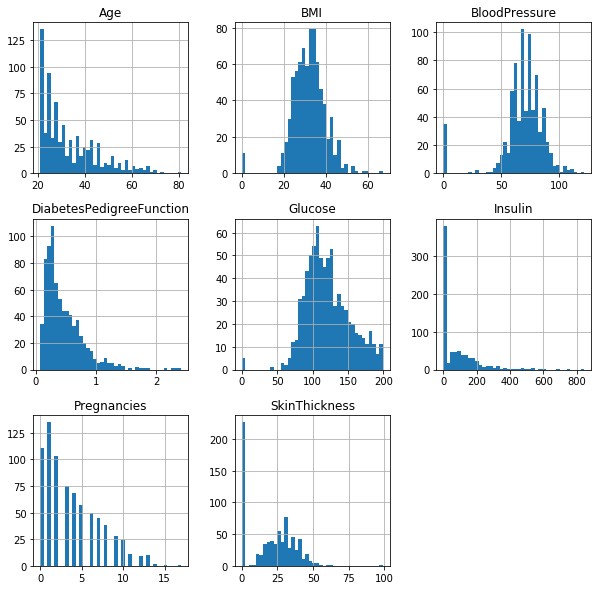

In [9]:
# Plotting Histogram of Data
Data_X.hist(bins = 40)

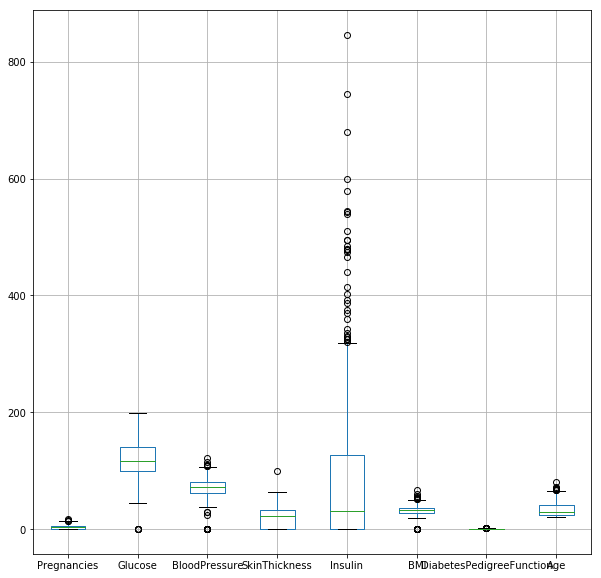

In [12]:
# Plotting Histogram of Data
Data_X.boxplot()

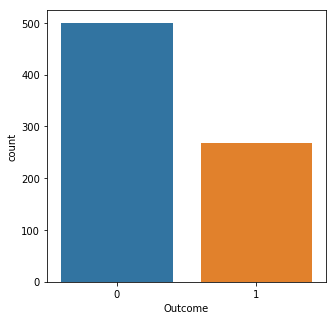

In [13]:
matplotlib.rcParams['figure.figsize'] = [5, 5]
sns.countplot(x = 'Outcome', data = Data)

### Plots with outcome as colored

/Users/gouravawasthi/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/gouravawasthi/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/gouravawasthi/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


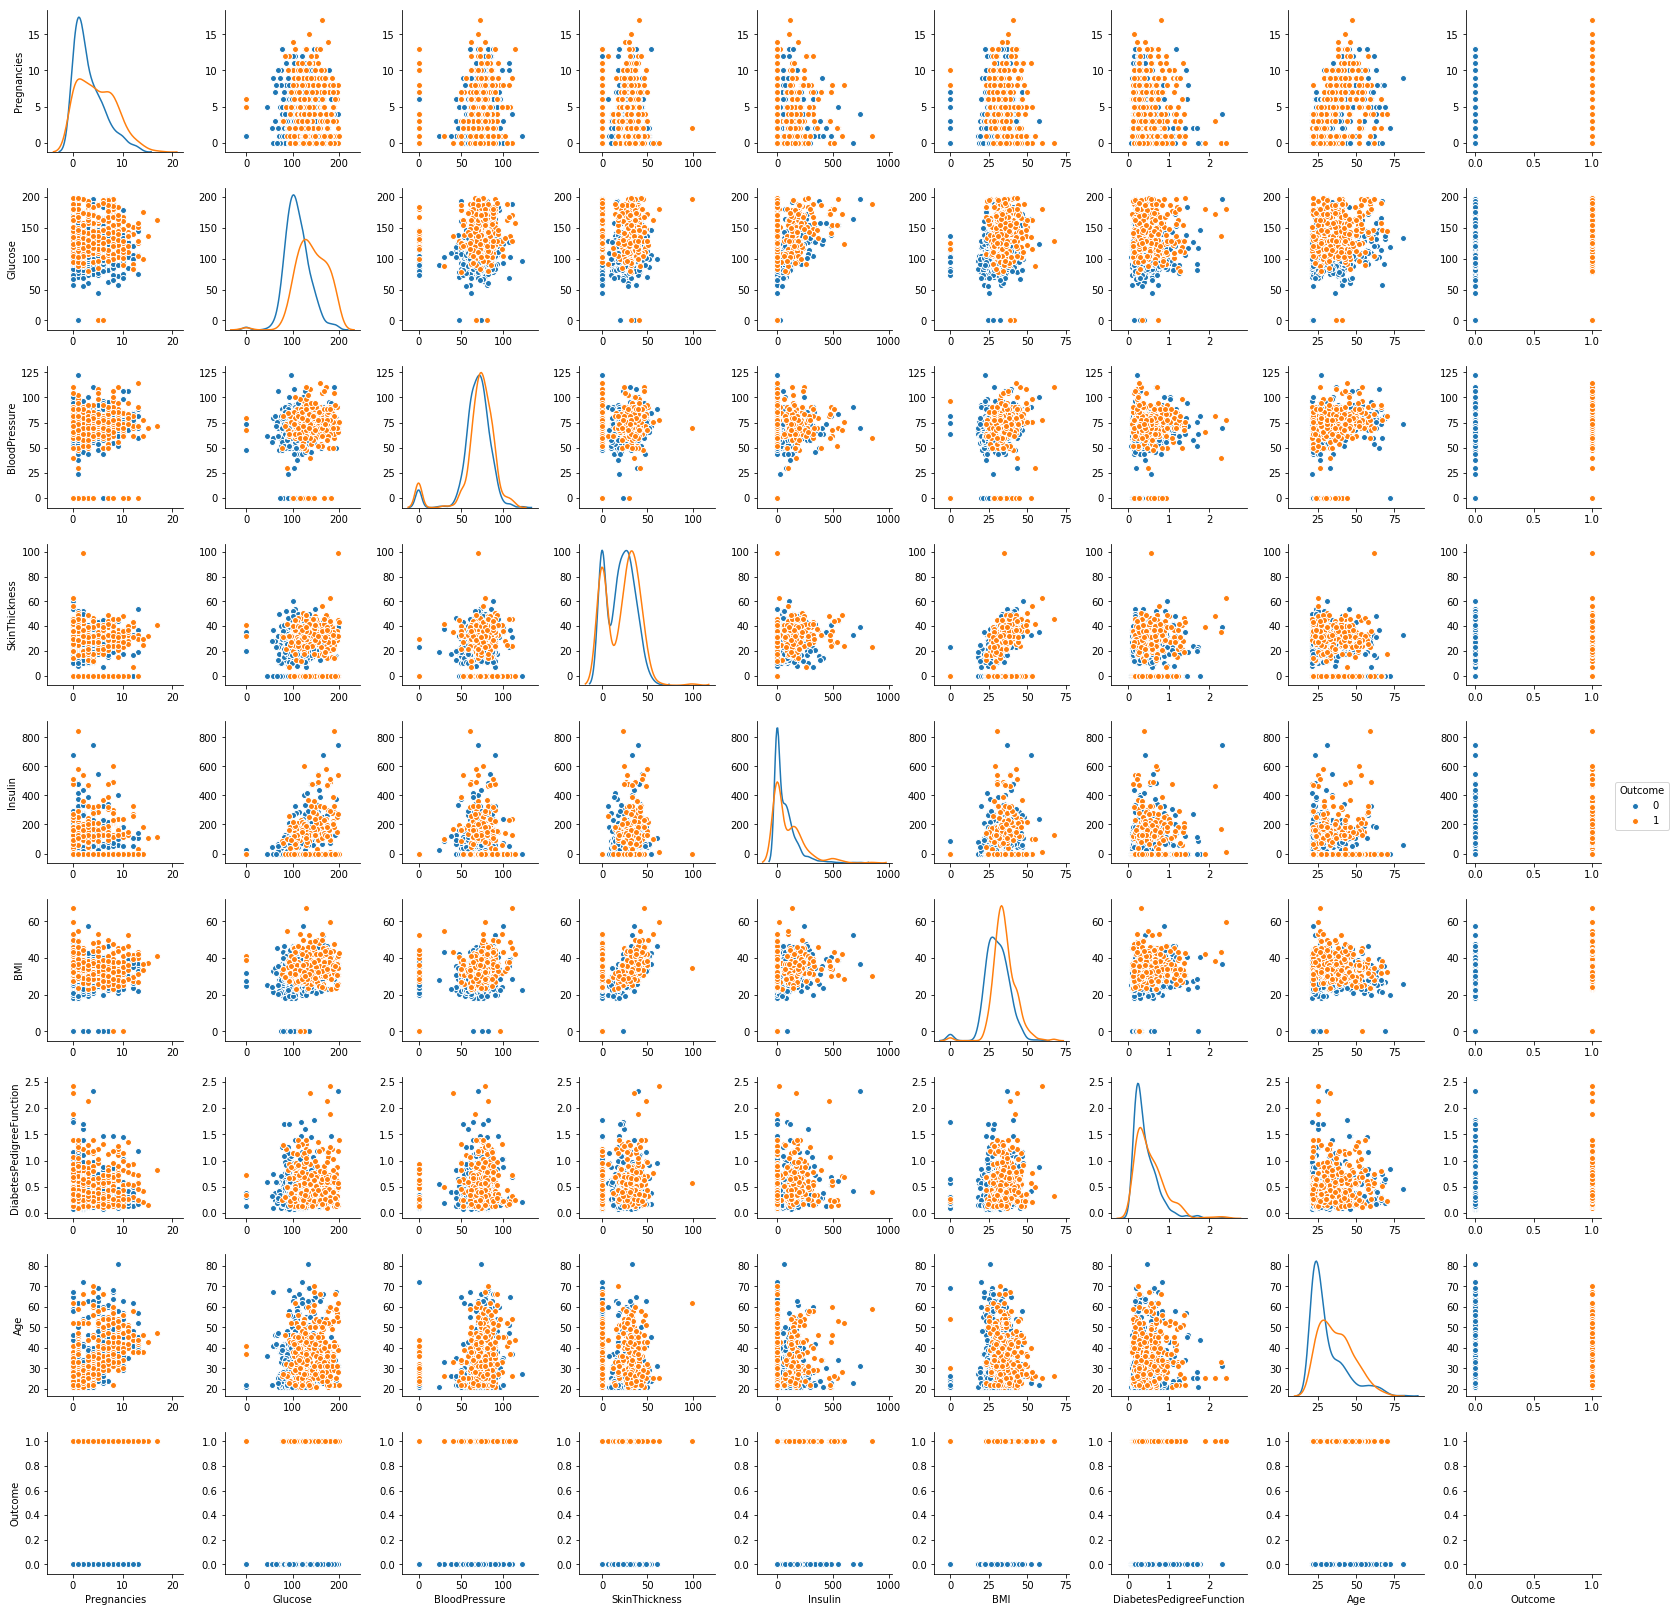

In [14]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
sns.pairplot(Data,hue = 'Outcome', diag_kind='kde')

In [15]:
X = Data.drop(['Outcome'], axis =1)
for i, c in enumerate(X.columns) :
    print(c+"\nKurtosis :"+ str(kurtosis(X[c]))+"\nSkewness :"+str(skew(X[c])))


Pregnancies
Kurtosis :0.150382737609
Skewness :0.899911940841
Glucose
Kurtosis :0.62881333373
Skewness :0.1734139552
BloodPressure
Kurtosis :5.13869066253
Skewness :-1.84000523117
SkinThickness
Kurtosis :-0.524494488765
Skewness :0.109158762324
Insulin
Kurtosis :7.15957491697
Skewness :2.26781045851
BMI
Kurtosis :3.26125742036
Skewness :-0.428143278809
DiabetesPedigreeFunction
Kurtosis :5.55079204755
Skewness :1.91615920374
Age
Kurtosis :0.63117694138
Skewness :1.12738925953


### Summary of Data exploration

#### The Data contains lot of missing values as 0 for Glucose, Blood Pressure, Skin Thick ness and Insulim
#### There are outlier in  almost every variable: This could be because of Inclusion of missing values as 0 in the Data.
#### 'Pregnancies' , 'Insulin', 'DiabetesPedigreeFunction' and  'Age' looks highly skewed, indiacating presence of outliers, however it may be because of data following poisson distribution.

In [16]:
## Visualizing Pattern of Data set in terms of heatmap which can reveal information about distribution of data and pattern of data collection
## If Data sampling has correlation or pattern it could show row wise correlations in Data.

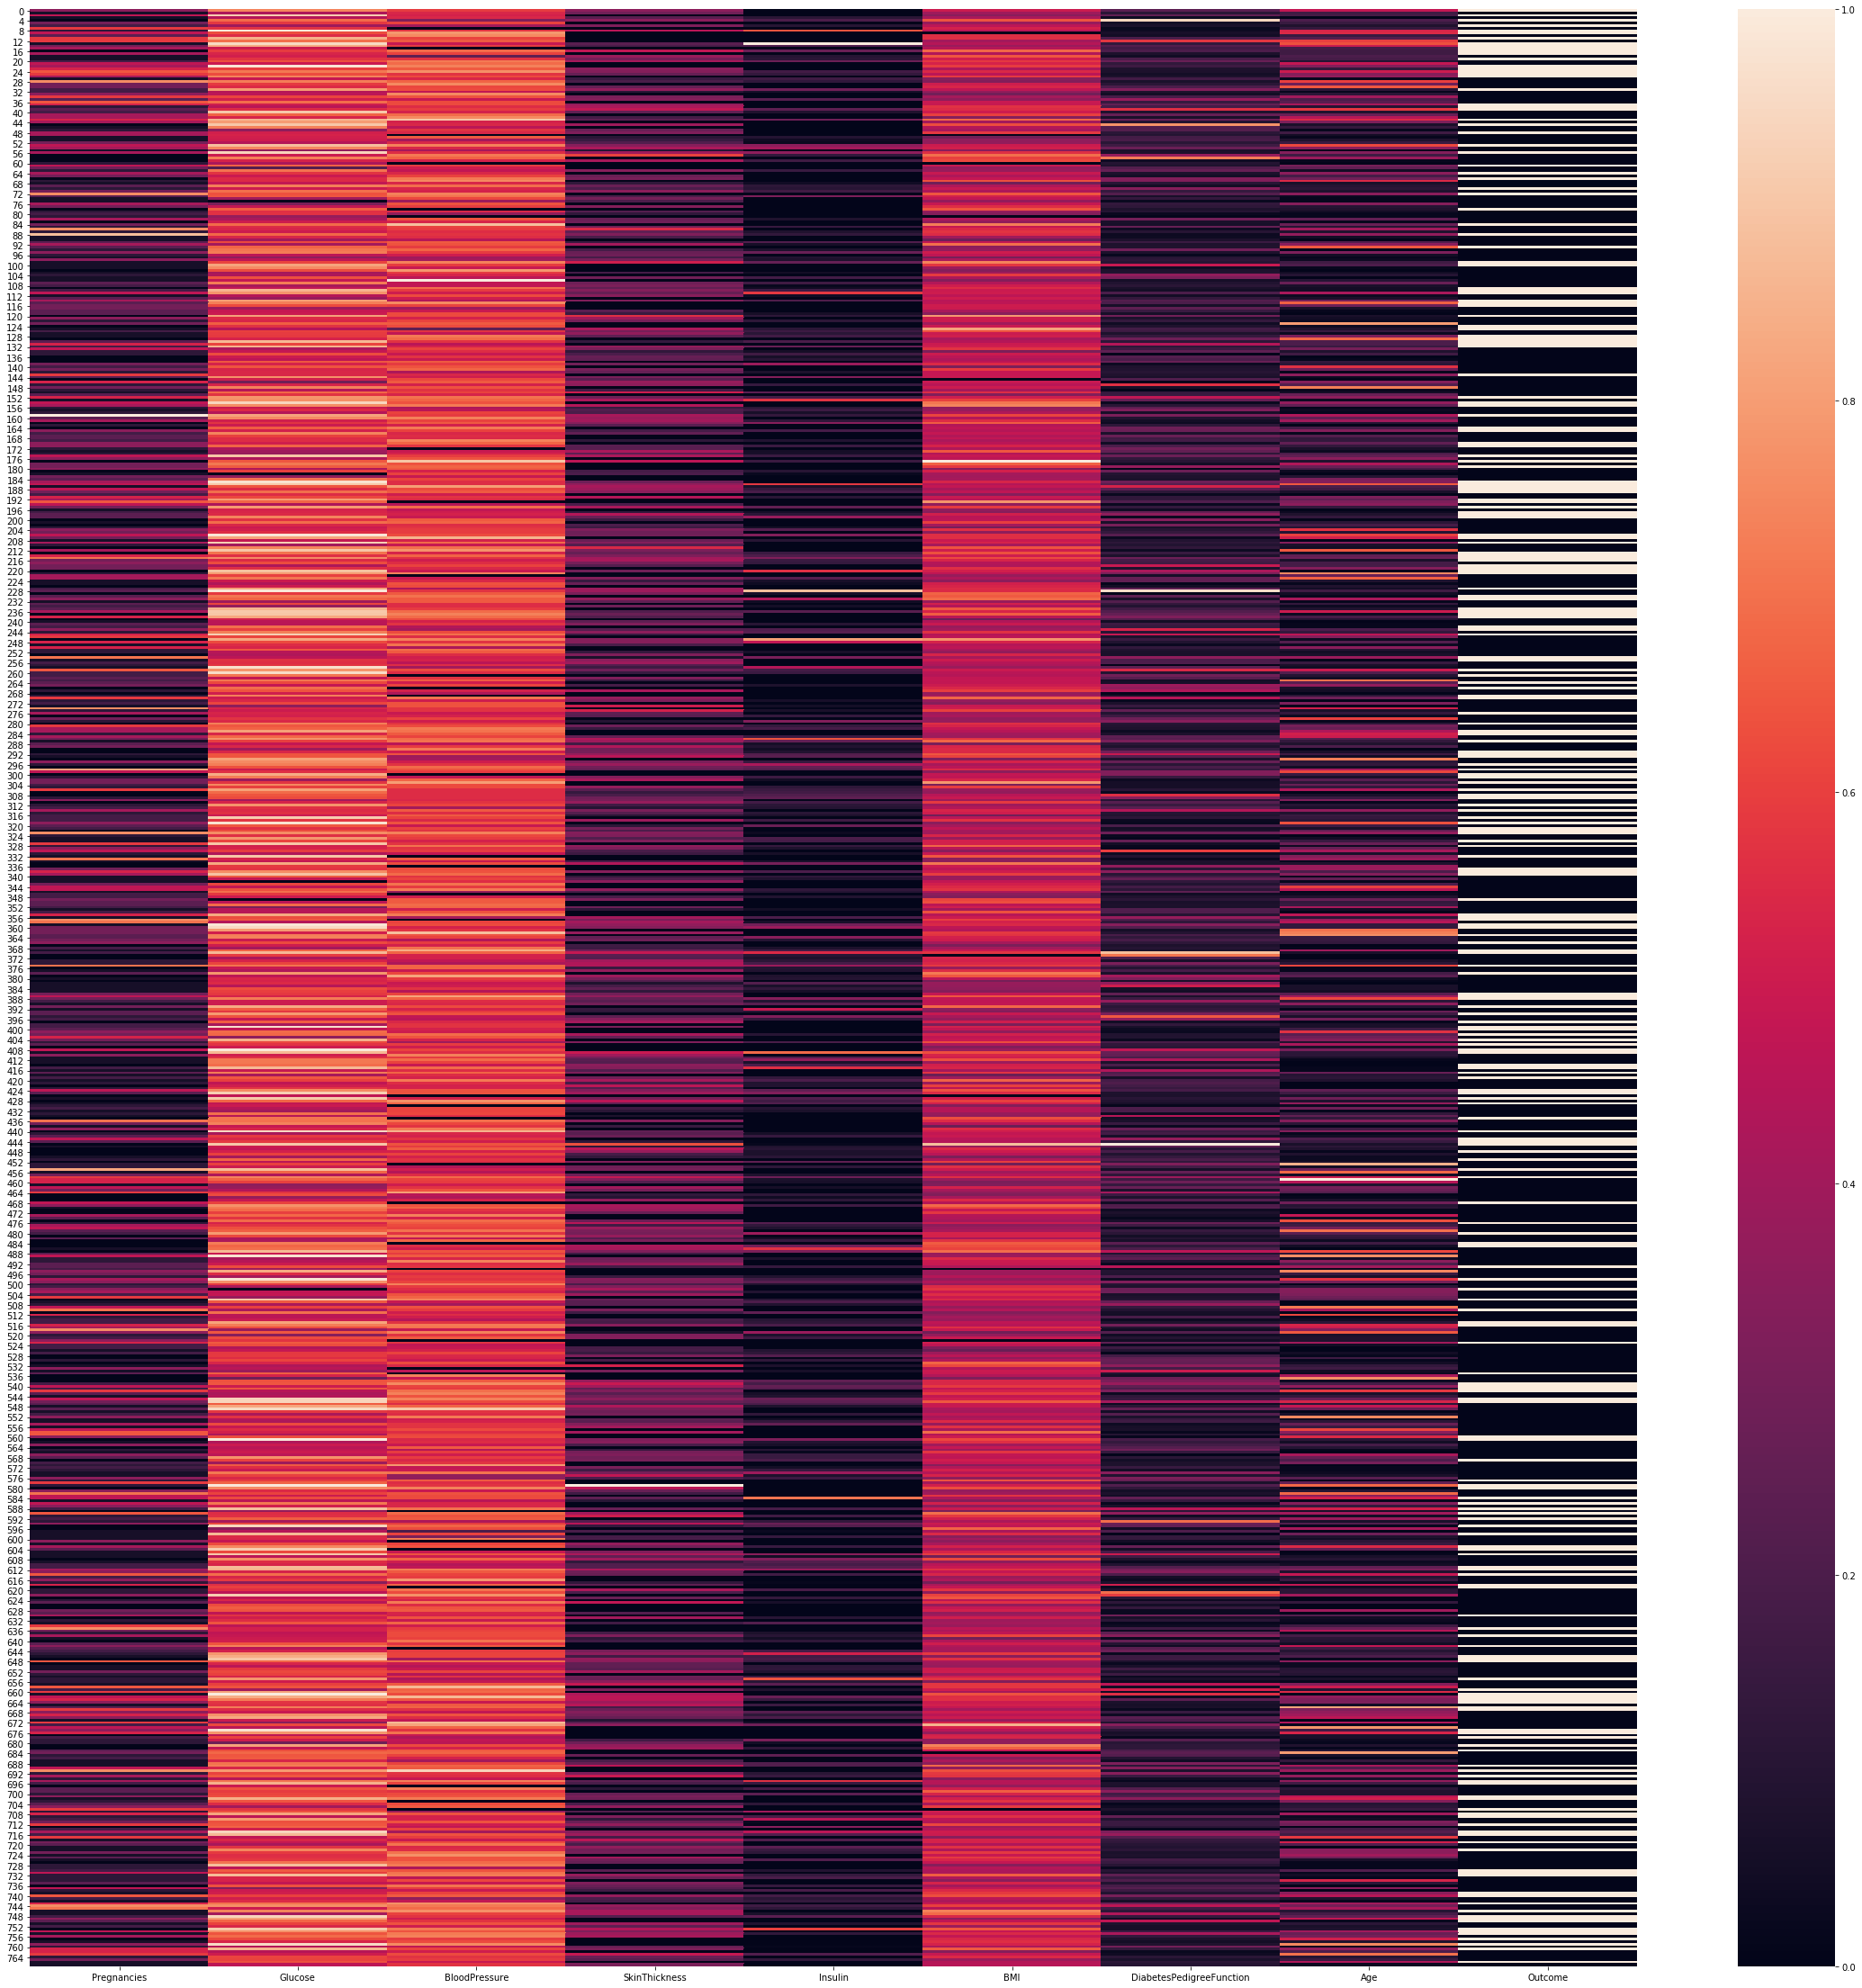

In [17]:
Data_Scaled = Data.copy()
scaler = MinMaxScaler()
Data_Scaled = scaler.fit_transform(Data_Scaled)
Data_Scaled = pd.DataFrame(data = Data_Scaled,columns = Columns)
matplotlib.rcParams['figure.figsize'] = [40, 40]
sns.heatmap(Data_Scaled, annot=False)

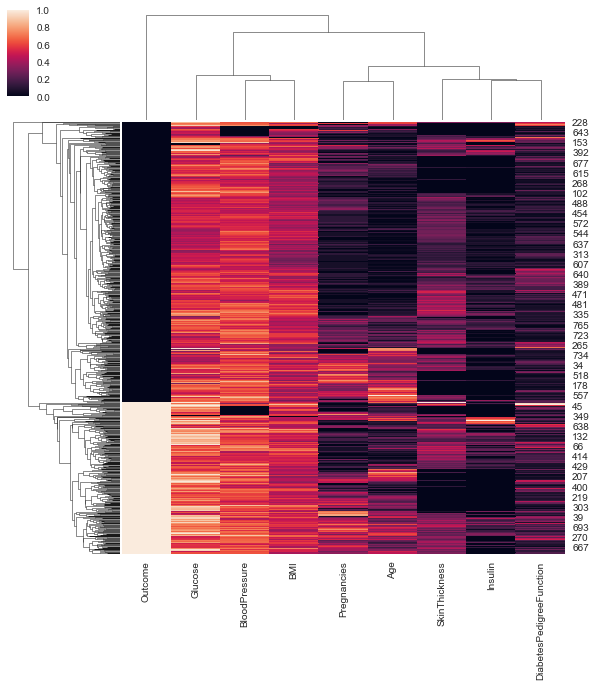

In [18]:
sns.set(color_codes=True)
sns.clustermap(Data_Scaled)

Glucose is closely related to Outcome (High Values of Glucose more prominent in Outcome = 1)
Blood Pressure and BMI are associated Closely which inturn are more closer to Glucose levels and finally to Outcome
Age and Pregnancies are closely assoociated while Insulin and DiabetesePidegree Function are also related

### Exclude 0 as missing value in Data and rerun the analysis

In [19]:
Data['Glucose'] = Data['Glucose'].replace(0,np.NaN)
Data['BloodPressure'] = Data['BloodPressure'].replace(0,np.NaN)
Data['SkinThickness'] = Data['SkinThickness'].replace(0,np.NaN)
Data['Insulin'] = Data['Insulin'].replace(0,np.NaN)
Data['BMI'] = Data['BMI'].replace(0,np.NaN)

### Checking Skewness and Kurtosis

In [20]:
X = Data.drop(['Outcome'], axis =1)
for i, c in enumerate(X.columns) :
    temp = X[c][X[c].notnull()]
    print(c+"\nKurtosis :"+ str(kurtosis(temp))+"\nSkewness :"+str(skew(temp)))


Pregnancies
Kurtosis :0.150382737609
Skewness :0.899911940841
Glucose
Kurtosis :-0.283080974725
Skewness :0.529944081266
BloodPressure
Kurtosis :0.896780104991
Skewness :0.133878047417
SkinThickness
Kurtosis :2.89736103292
Skewness :0.688702697154
Insulin
Kurtosis :6.27477450042
Skewness :2.15820714703
BMI
Kurtosis :0.849771361463
Skewness :0.592792147563
DiabetesPedigreeFunction
Kurtosis :5.55079204755
Skewness :1.91615920374
Age
Kurtosis :0.63117694138
Skewness :1.12738925953


#### Rerun the above analysis

In [21]:
# Seperate X and Y Variables
Data_X = Data.copy(deep =True)
Data_X = Data_X.drop(['Outcome'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1adb0e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b038e90>]], dtype=object)

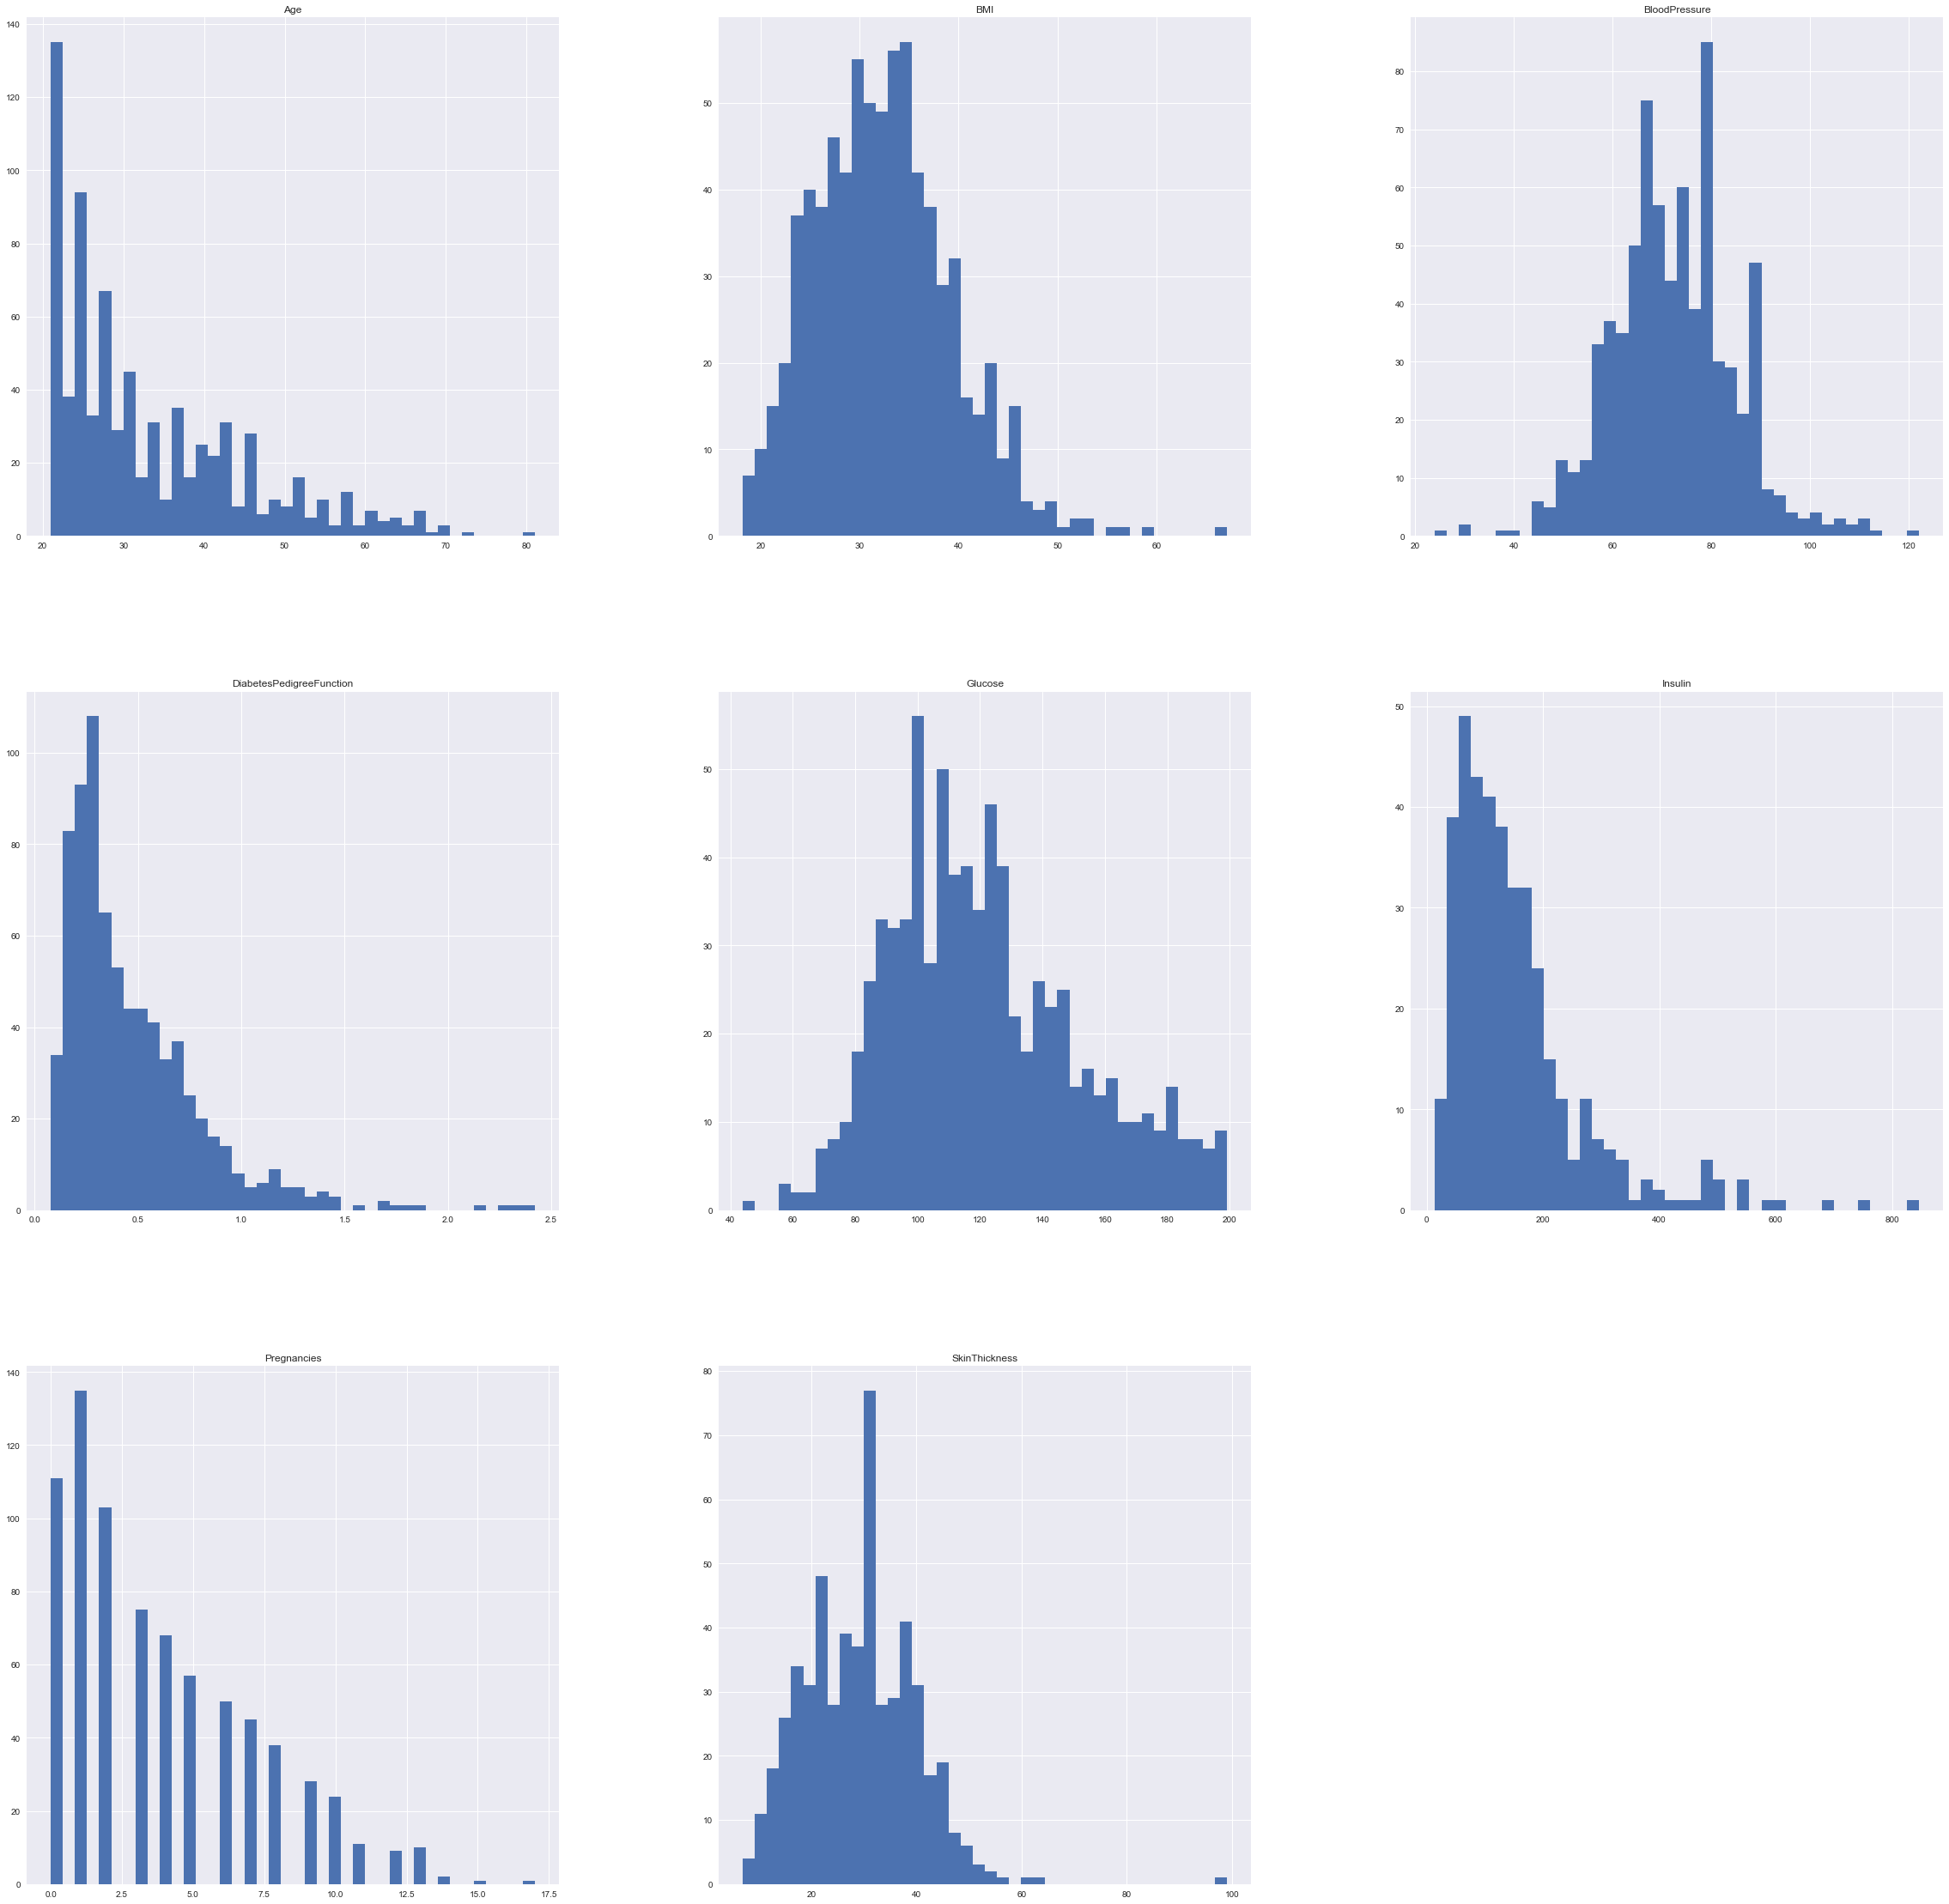

In [22]:
# Plotting Histogram of Data
Data_X.hist(bins = 40)

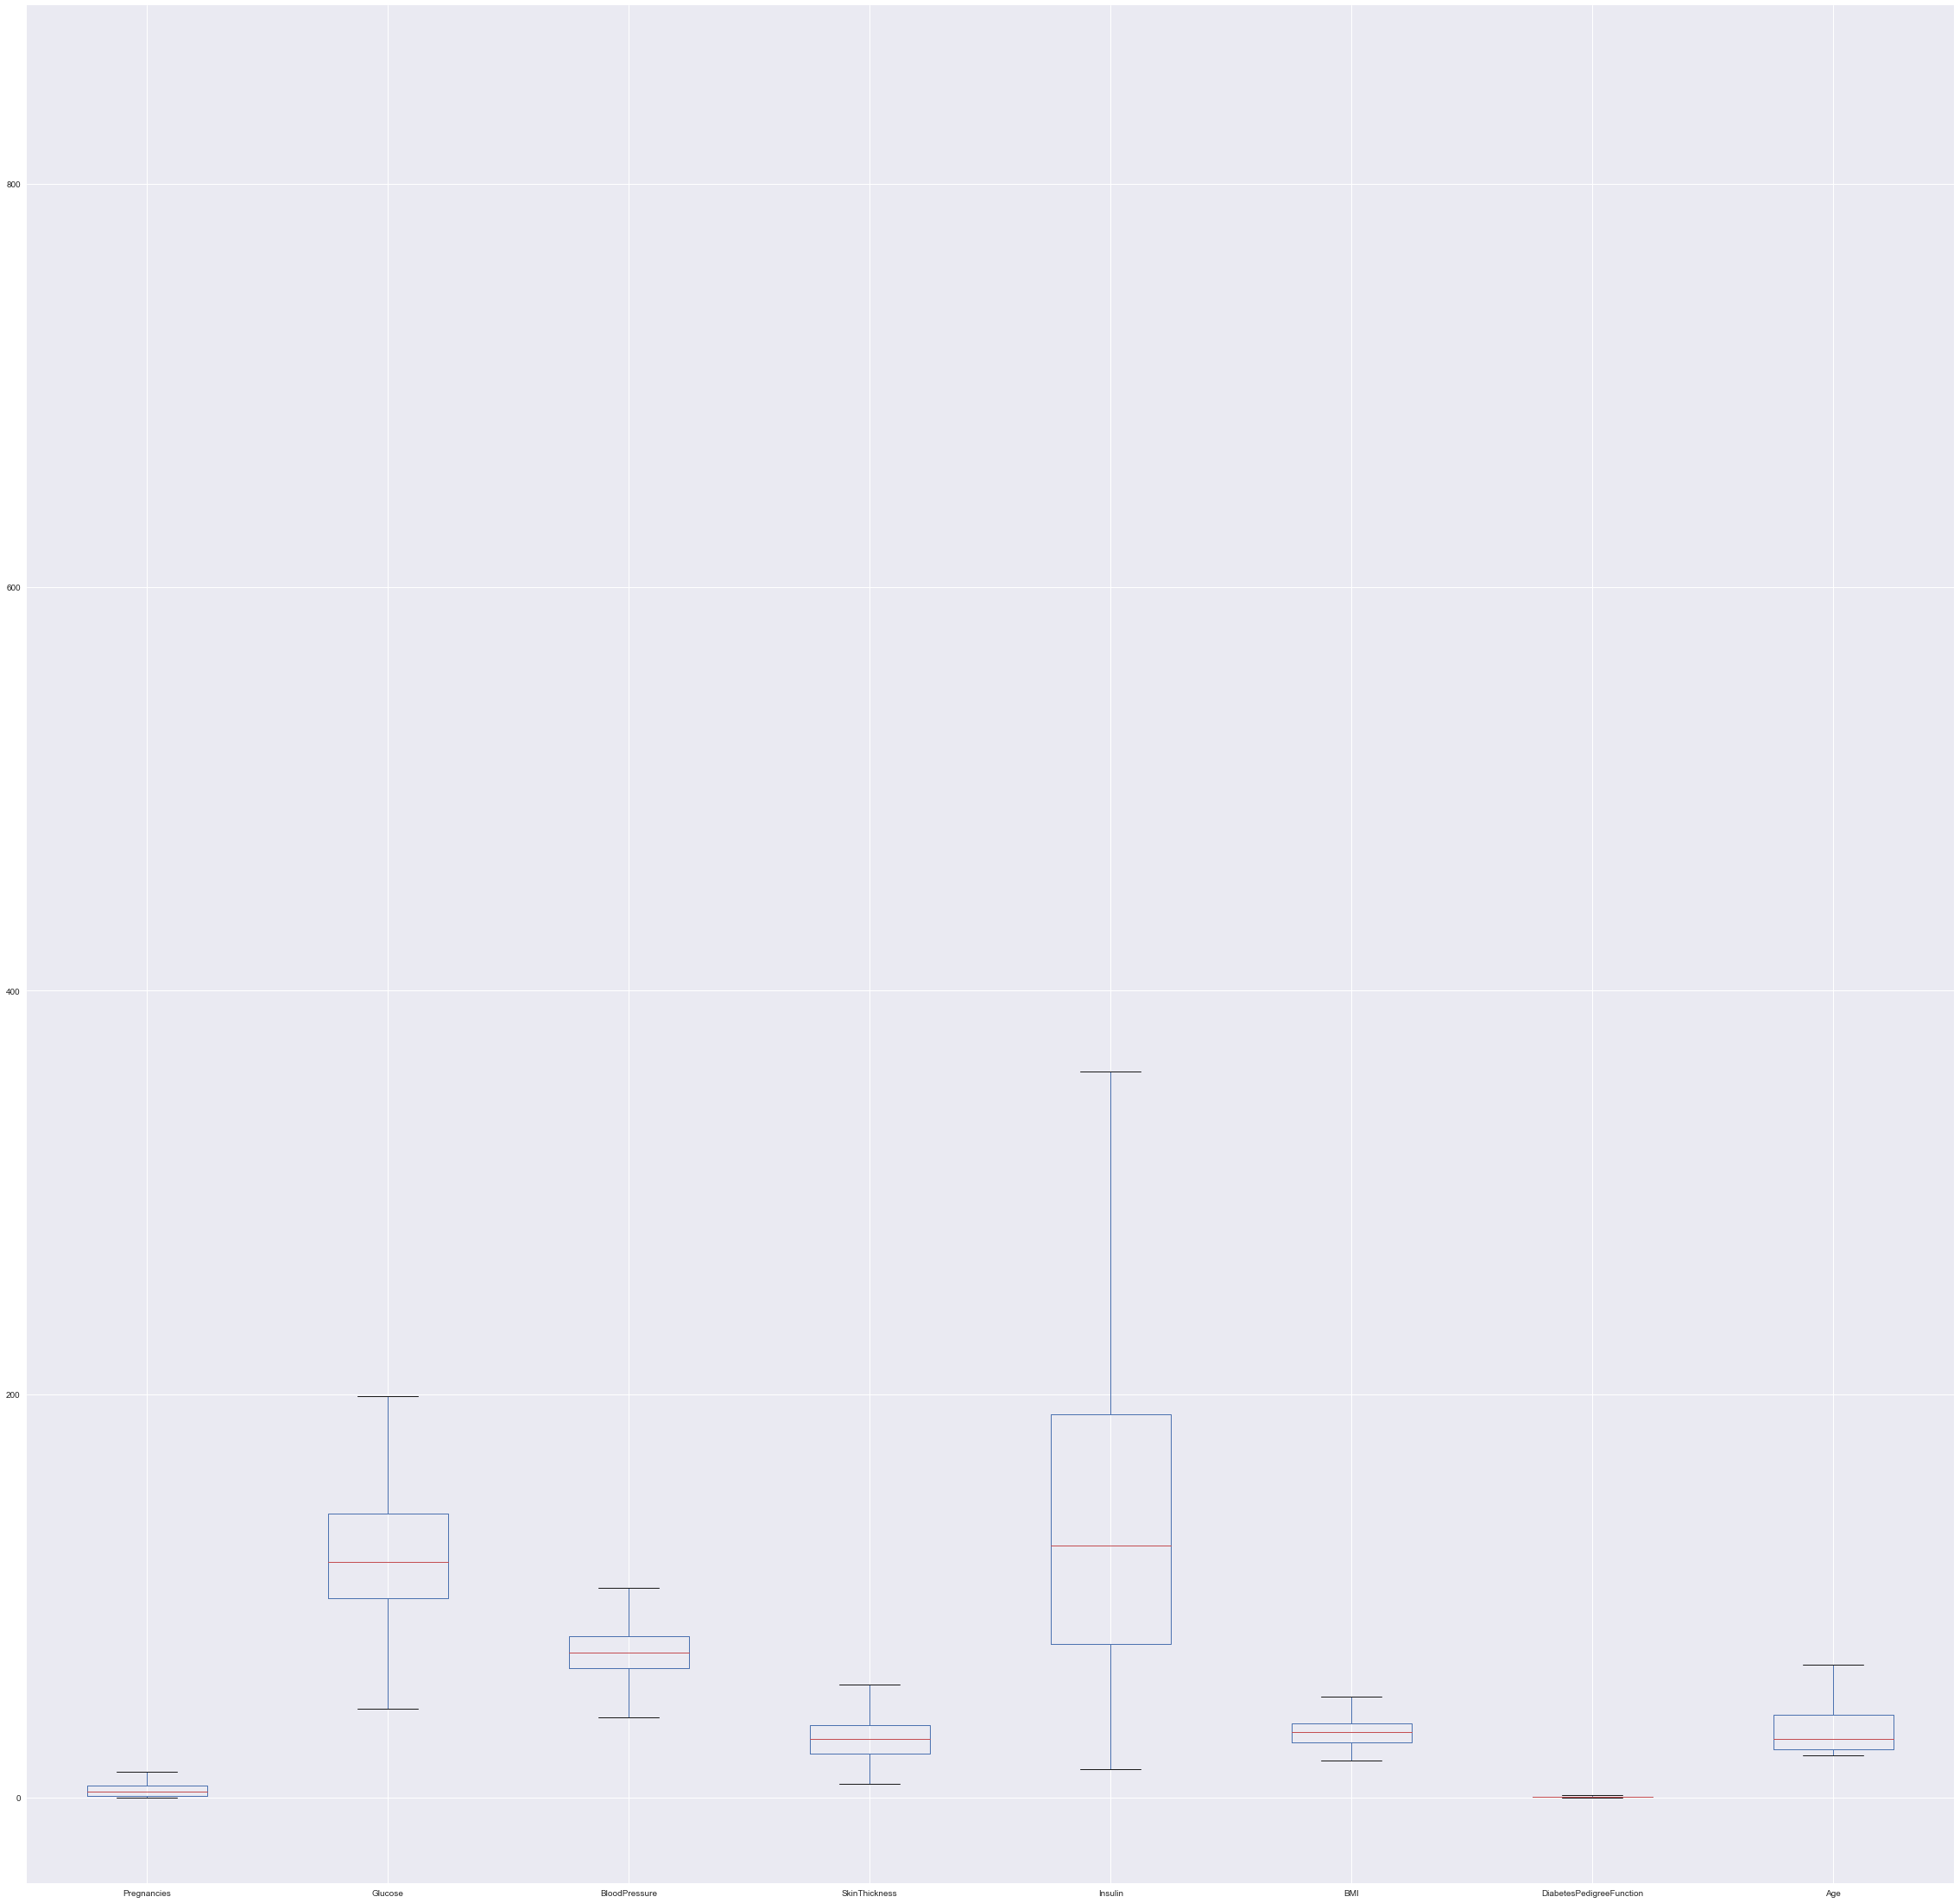

In [23]:
# Plotting Histogram of Data
Data_X.boxplot()

/Users/gouravawasthi/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/gouravawasthi/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


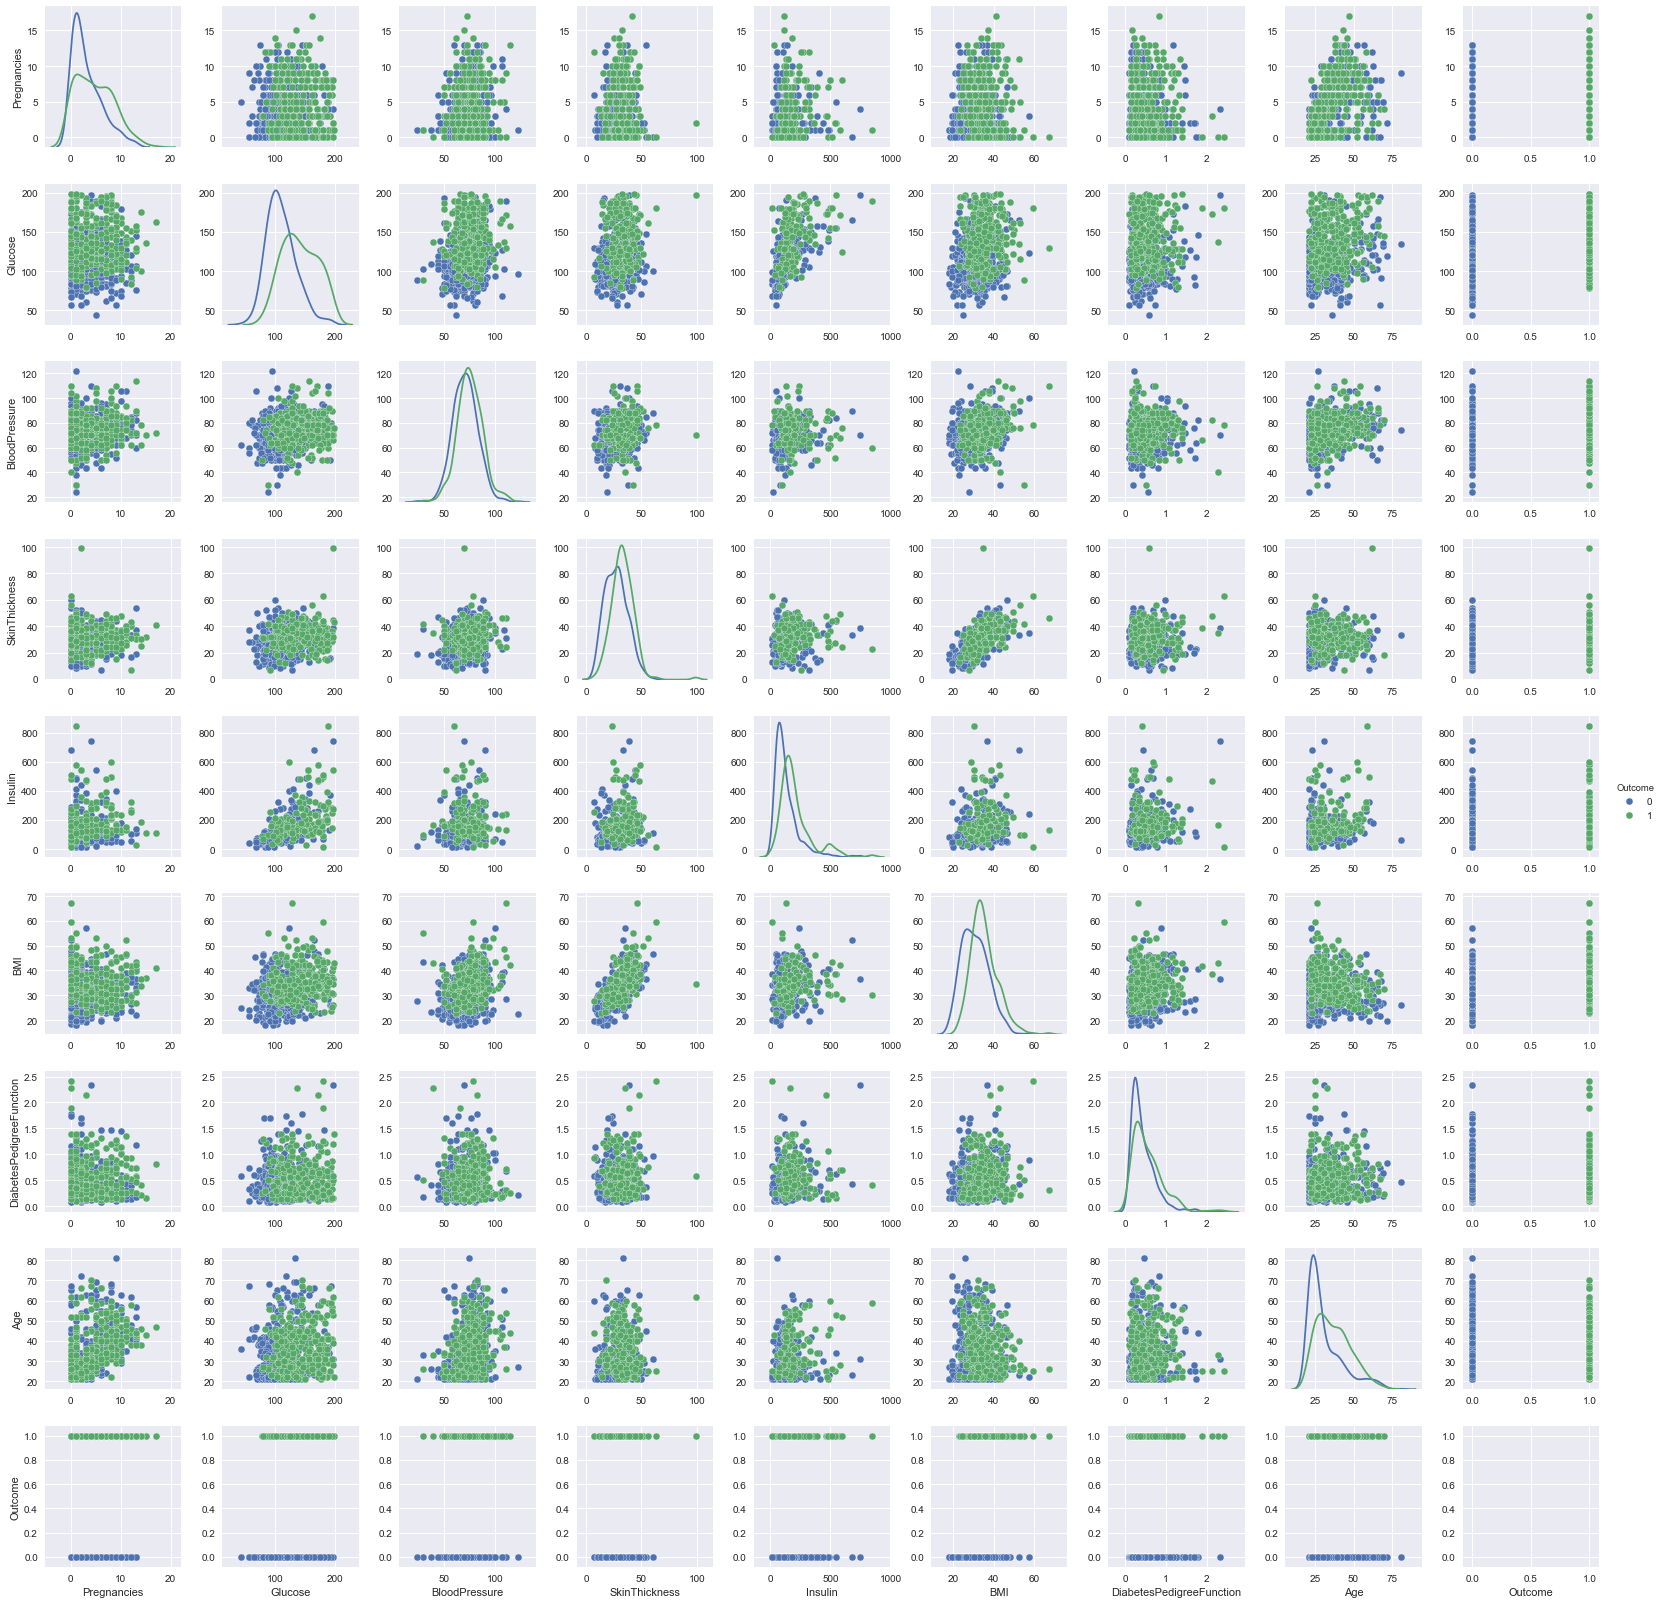

In [24]:
sns.pairplot(Data,hue = 'Outcome', diag_kind='kde')

### Check distribution for poisson as data is skewed causing outlier in Boxplot

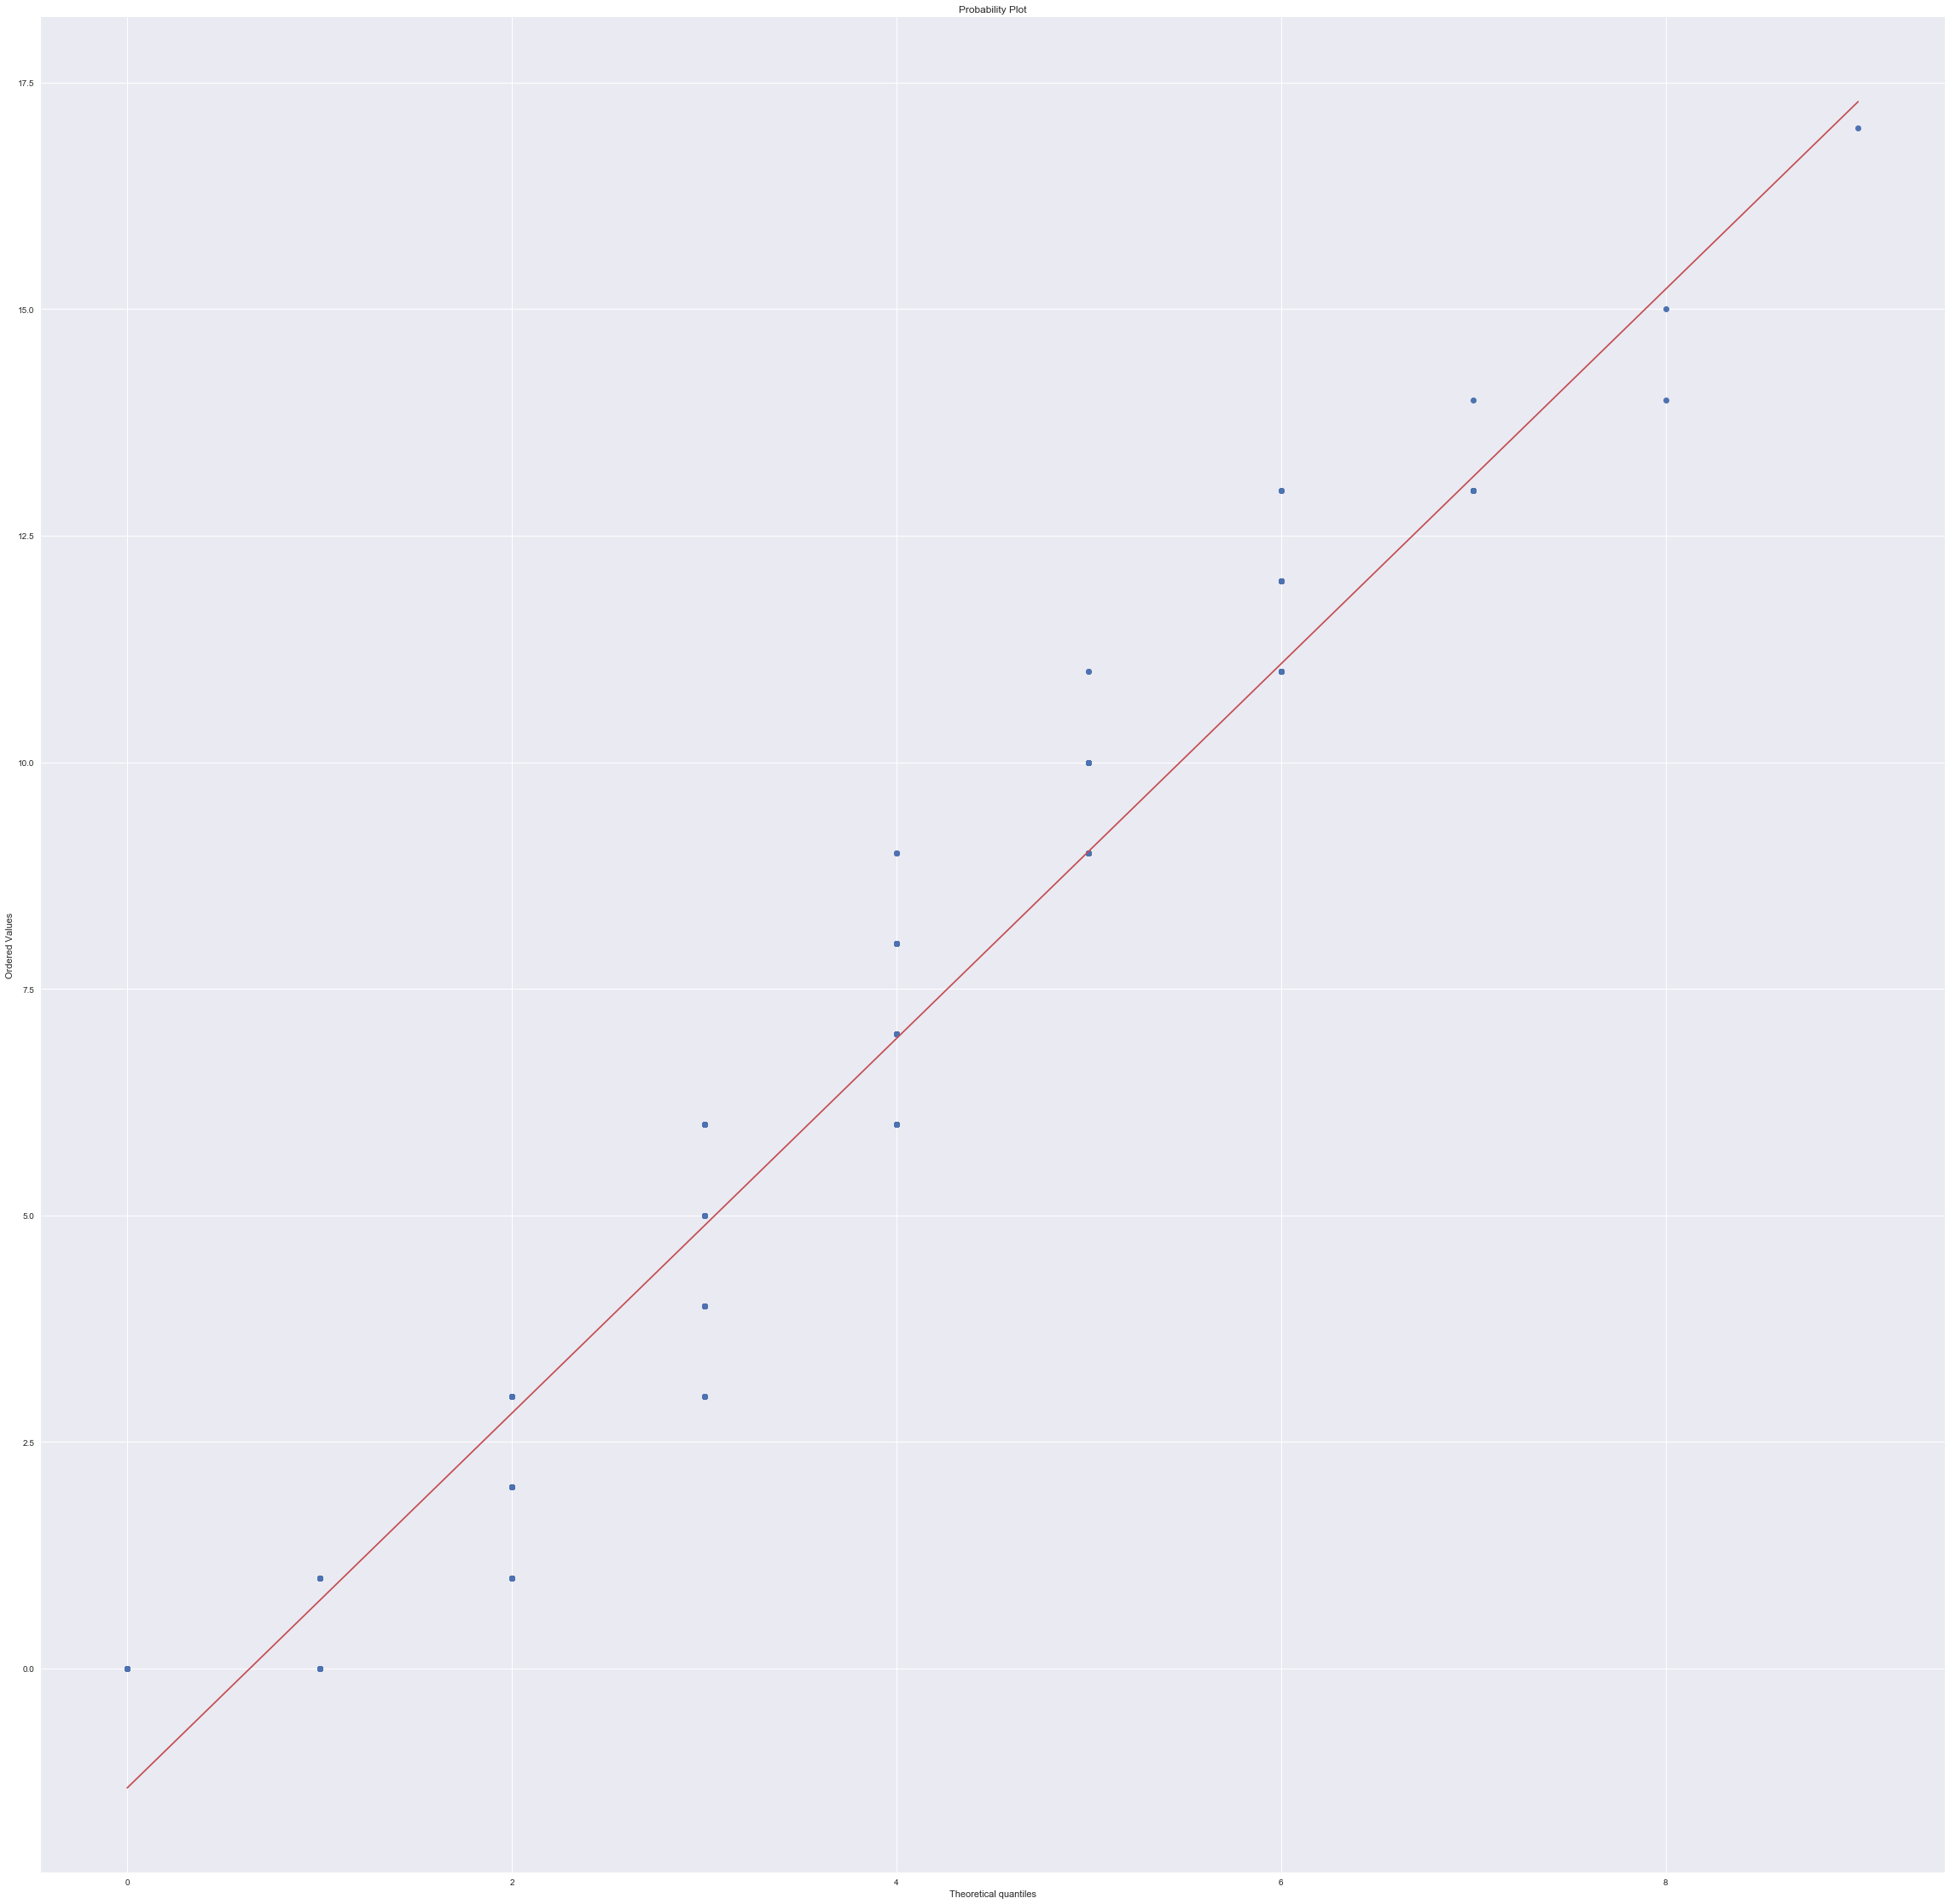

KstestResult(statistic=1.1102230246251565e-16, pvalue=0.99999999999999312)

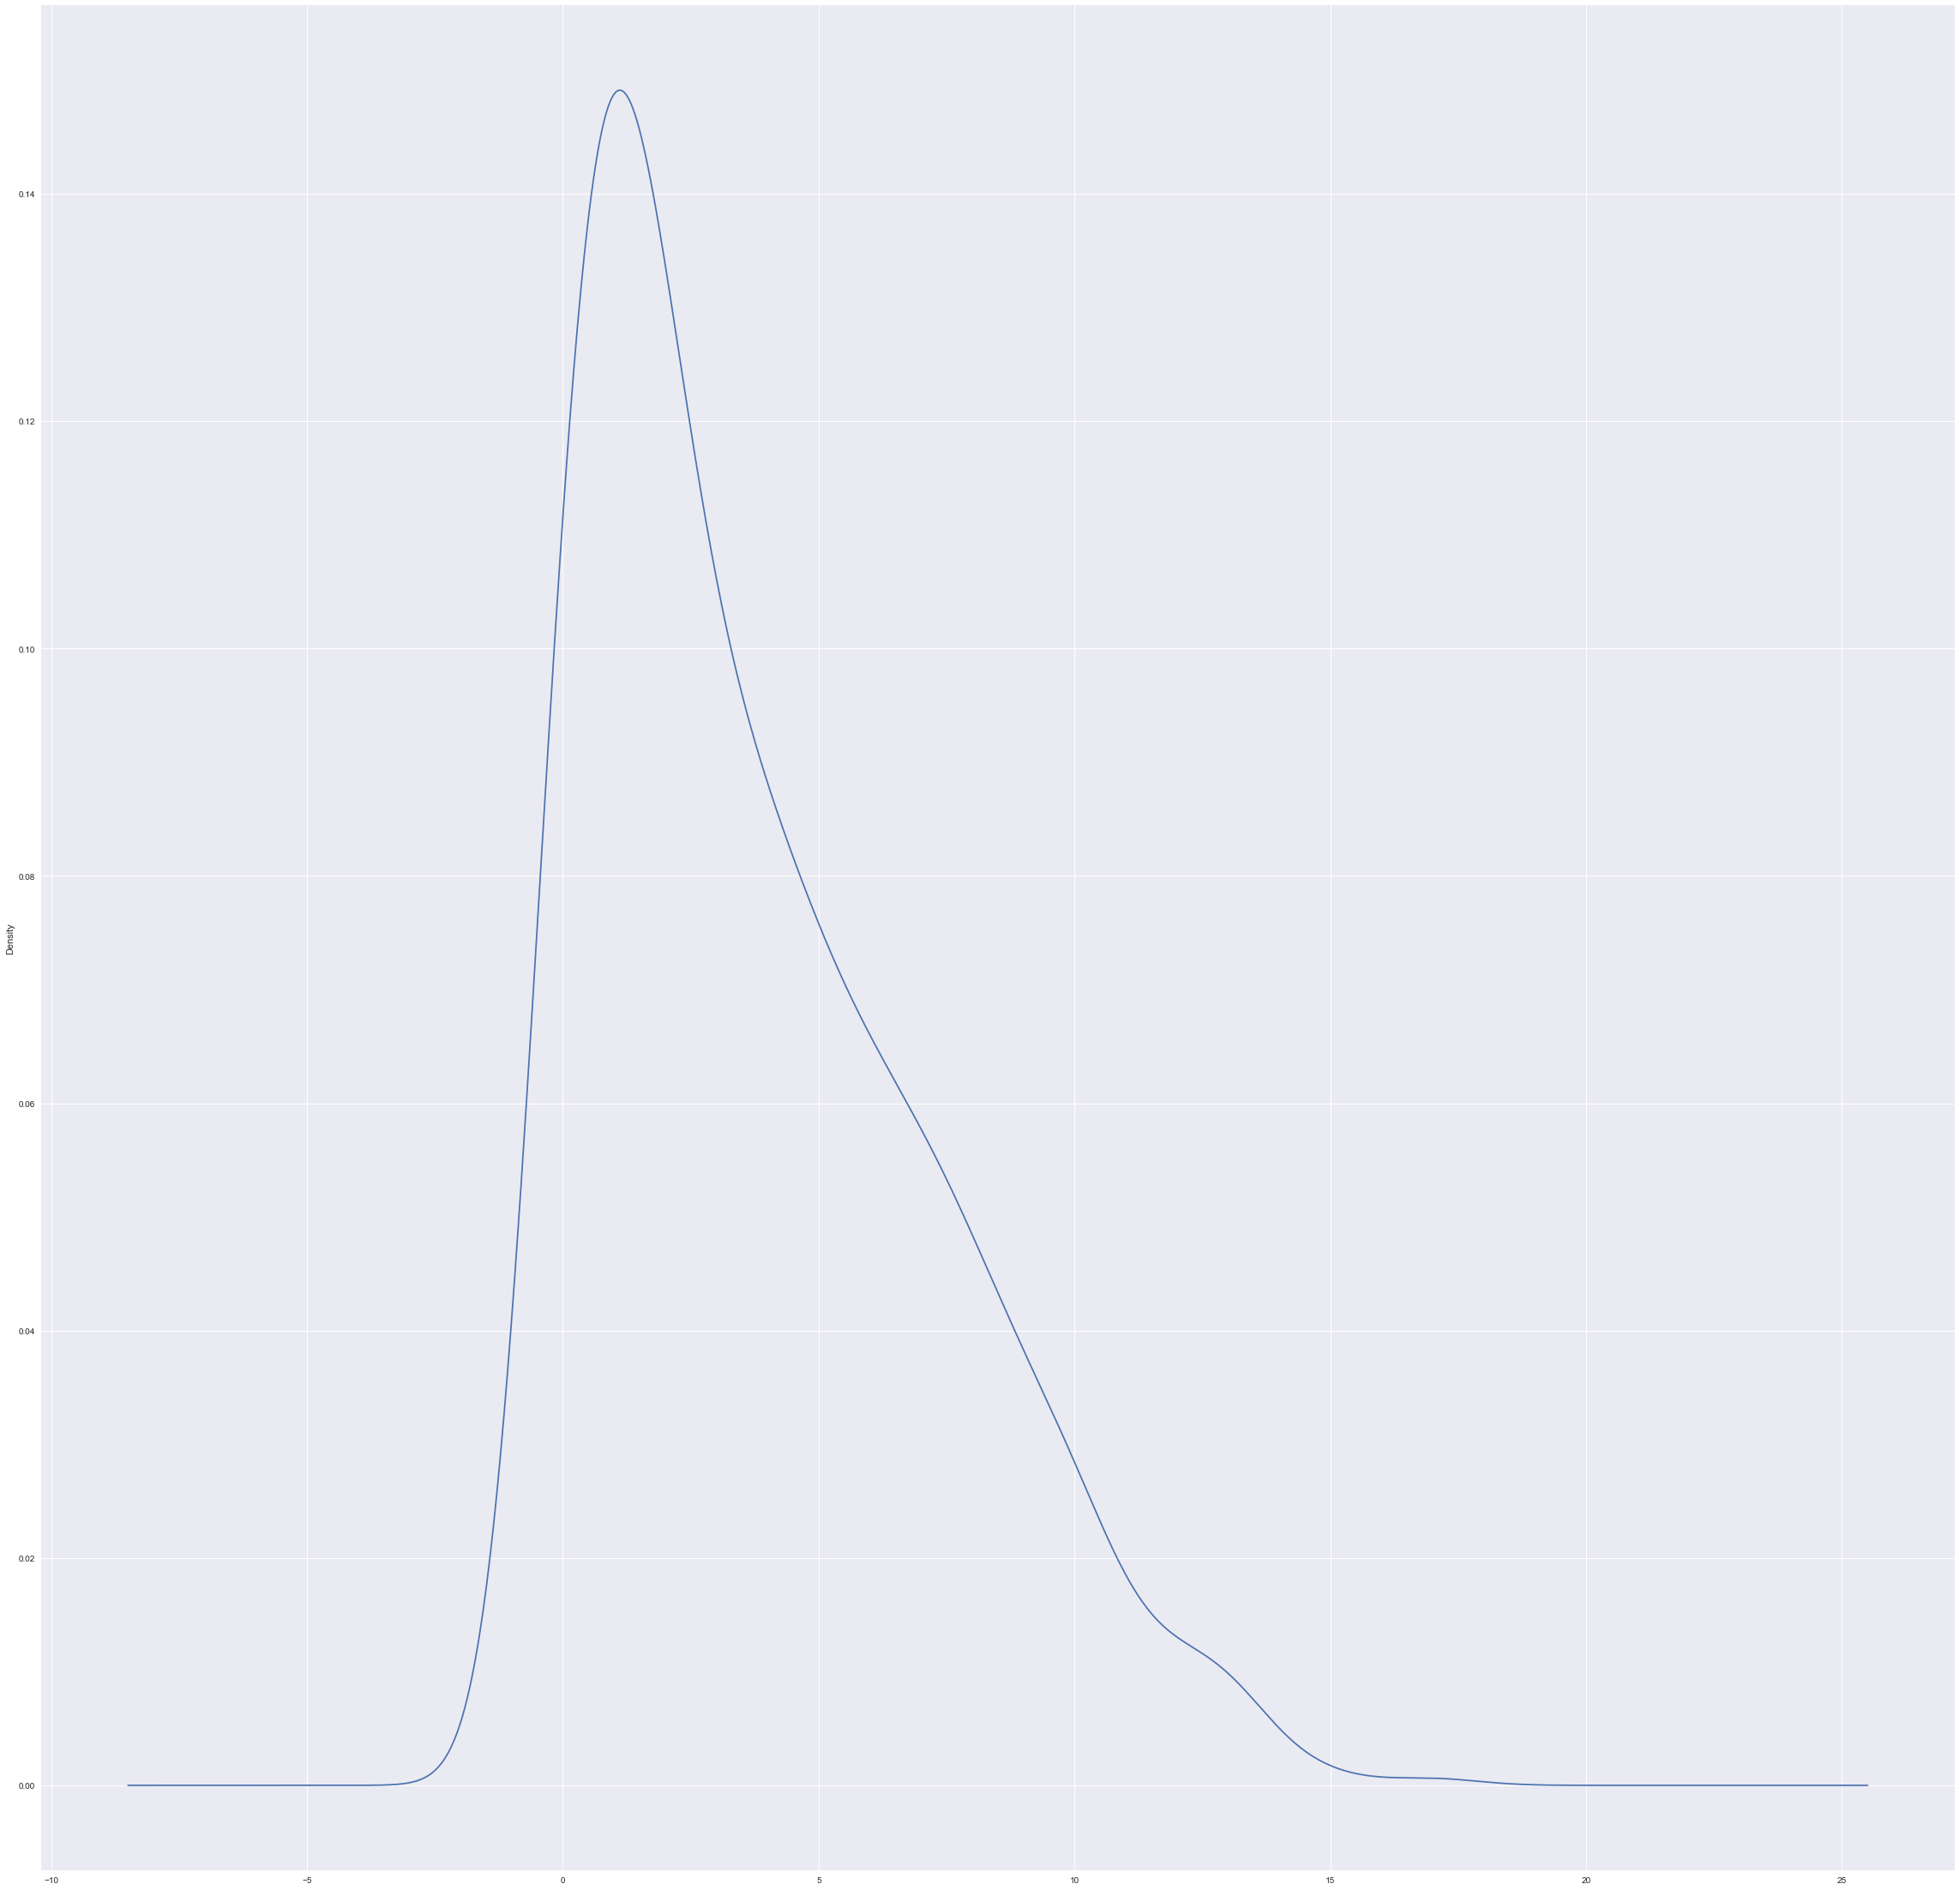

In [25]:
# Poison distribution test for Pregnancies
stats.probplot(Data.Pregnancies.values, dist='poisson', sparams=(2.5,), plot=plt)
plt.show()
Data.Pregnancies.plot.density()
#Does Pregnancies follow poison distribution?
#H0 : Pregnancies follow poisson distribution
#H1 : Pregnancies do not follow poisson distribution
stats.kstest(Data.Pregnancies,'poisson', args=(1,), alternative = 'greater')

#### Pregnancies follow Poisson distribution (alpha = 0.05 we accept Null Hypothesis, There are no significant outlier in QQ PLOT

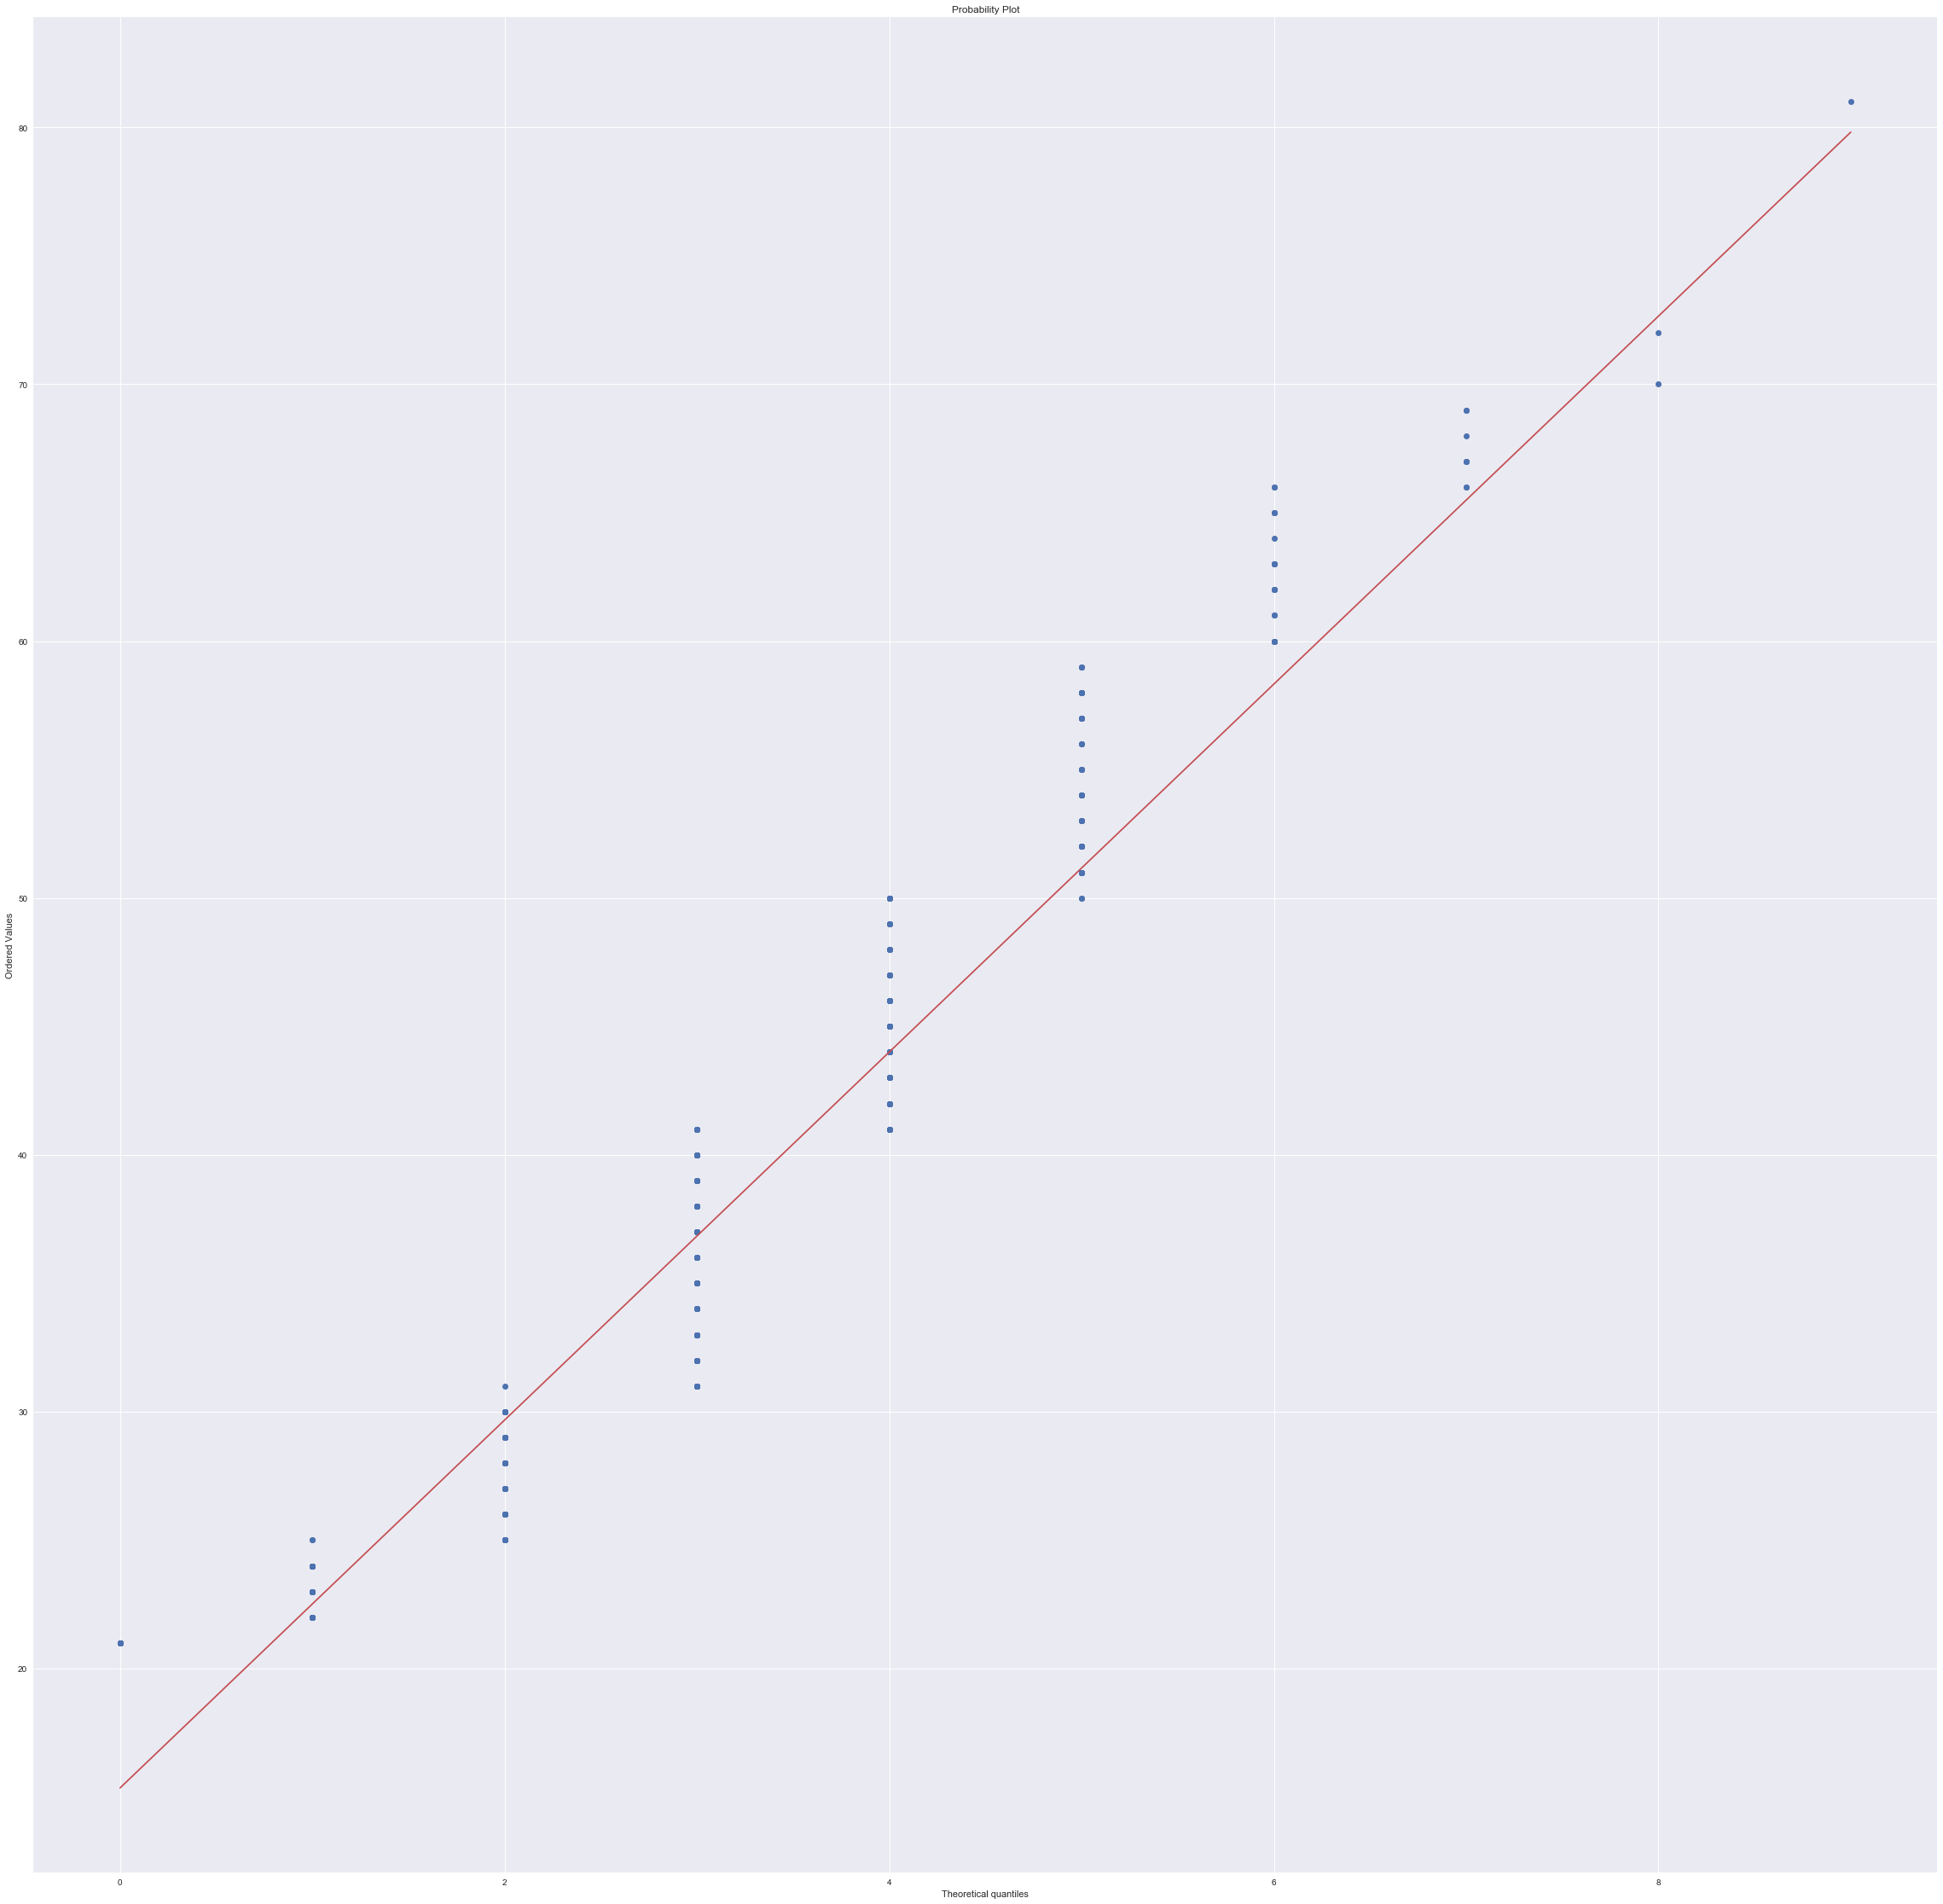

KstestResult(statistic=1.1102230246251565e-16, pvalue=0.99999999999999312)

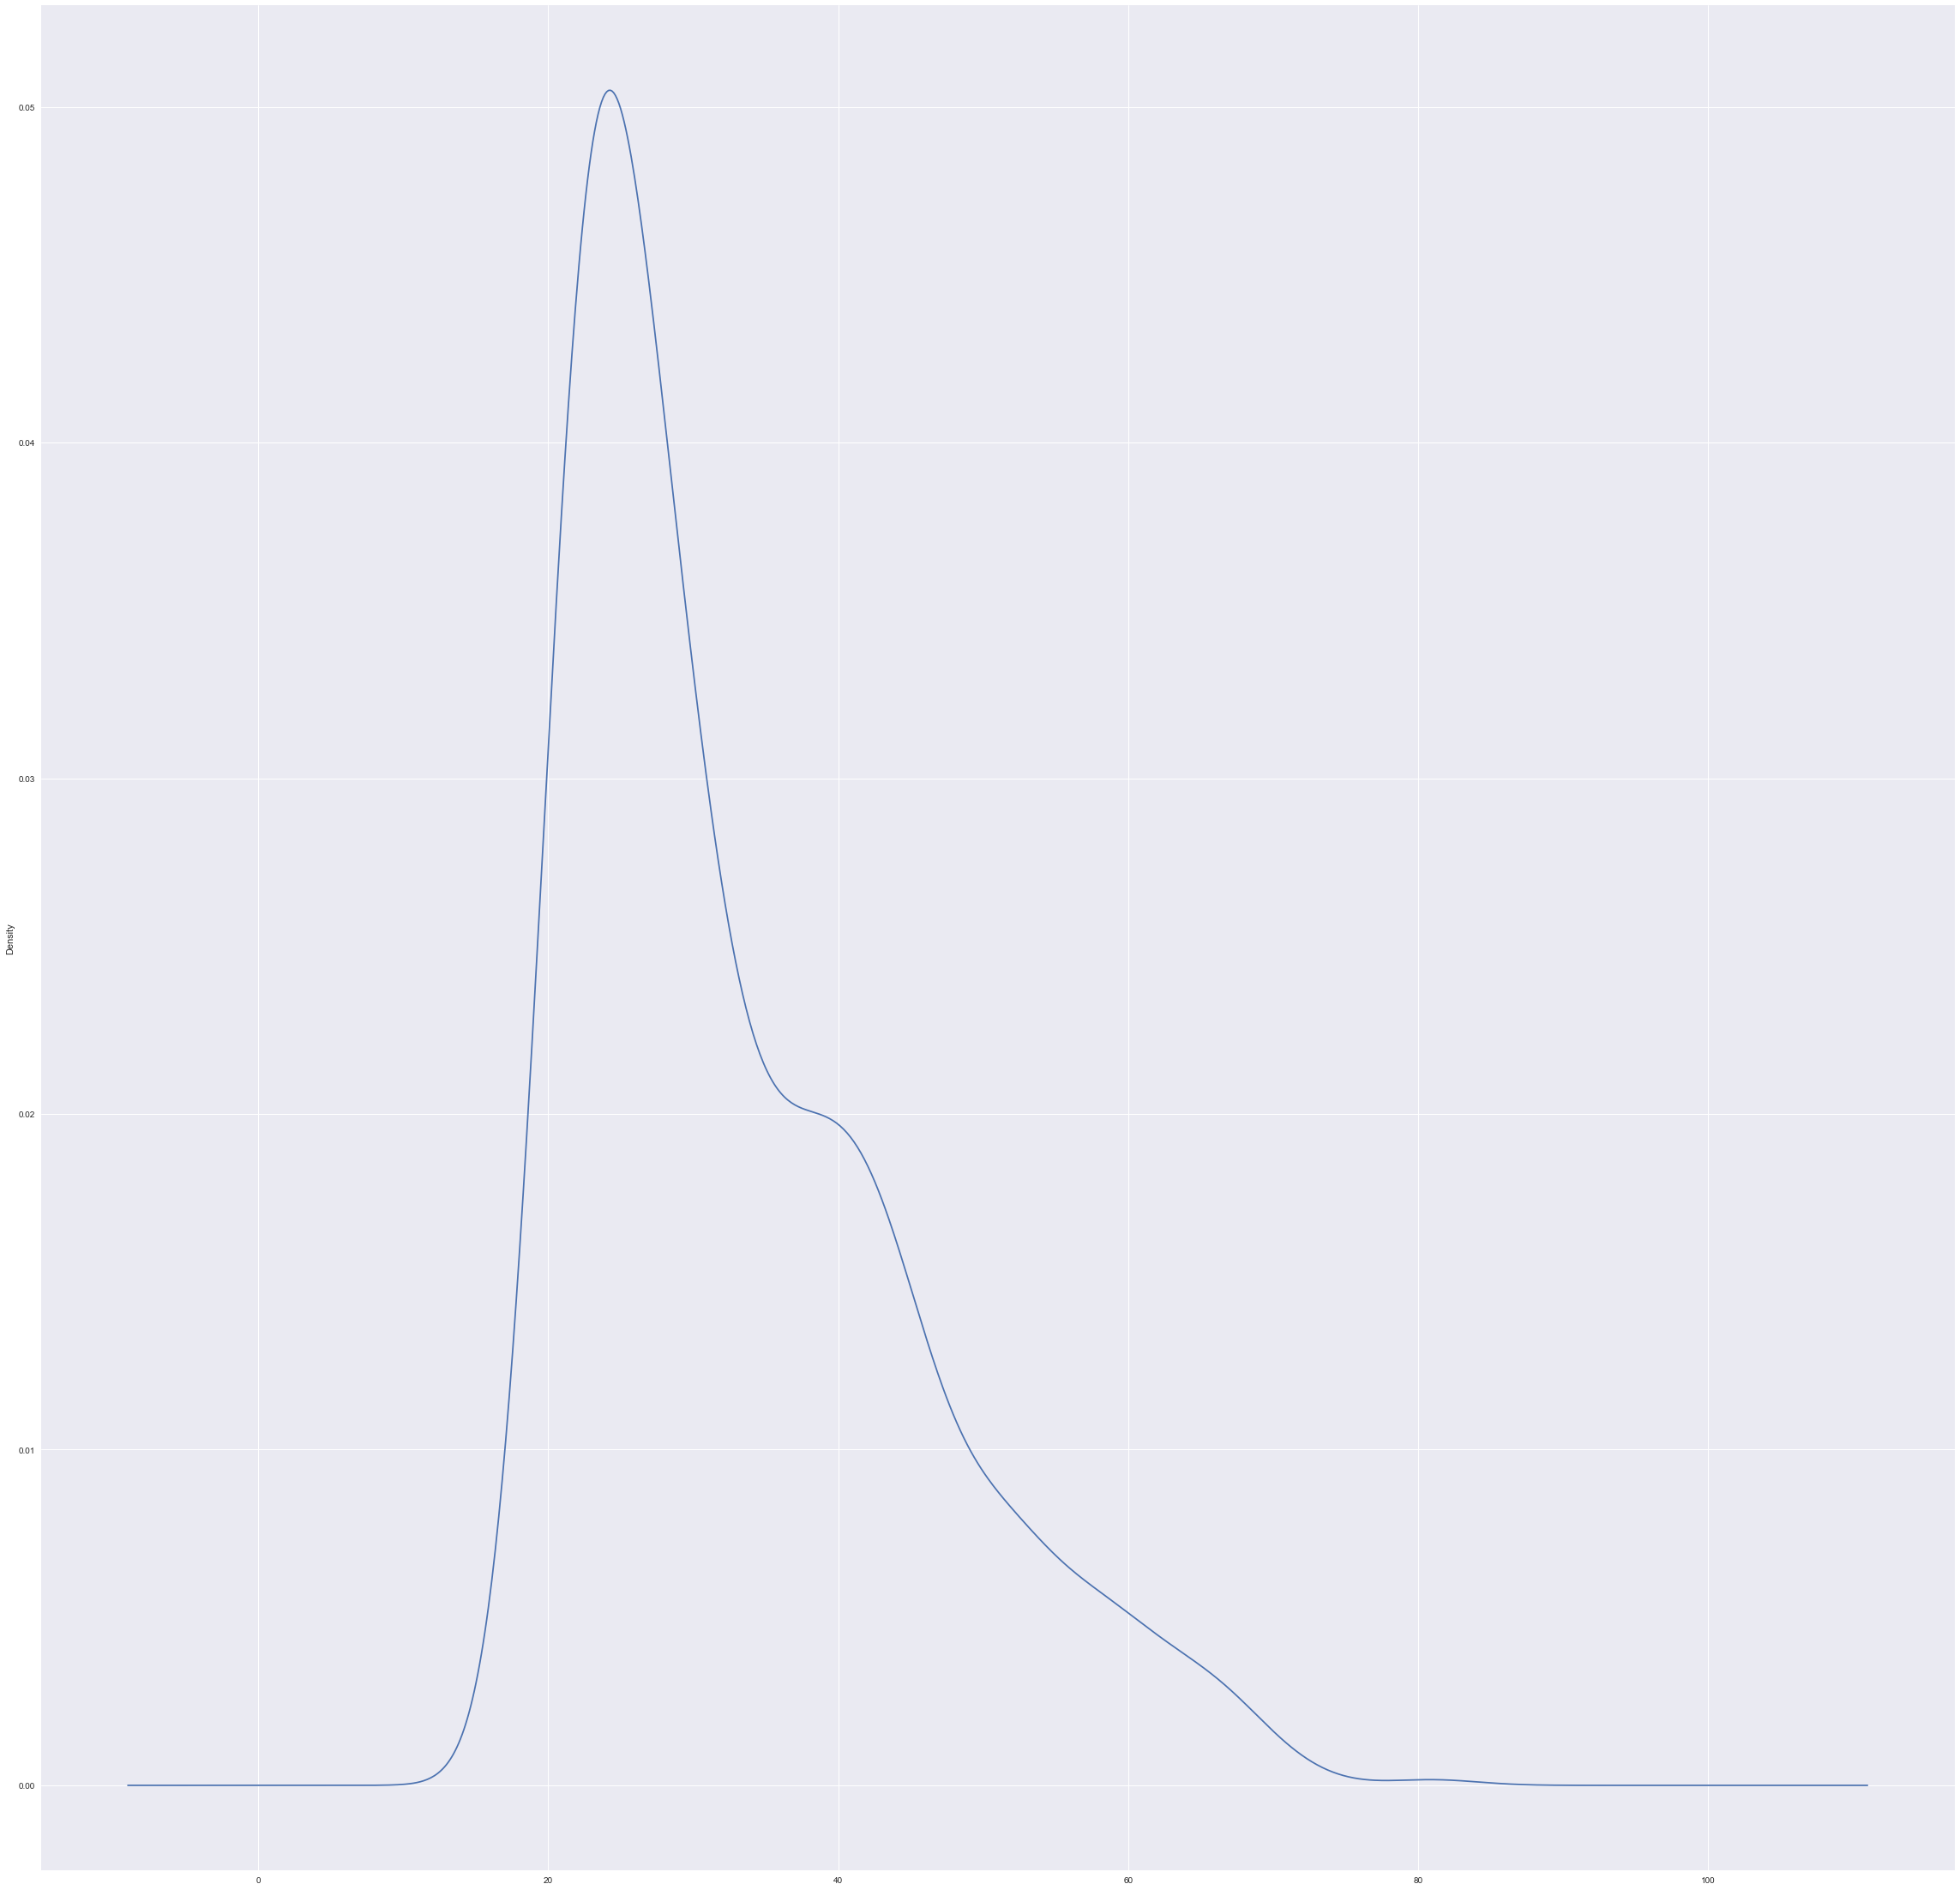

In [26]:
# Poison distribution test for Age
stats.probplot(Data.Age.values, dist='poisson', sparams=(2.5,), plot=plt)
plt.show()
Data.Age.plot.density()
#Does Age follow poison distribution?
#H0 : Age follow poisson distribution
#H1 : Age do not follow poisson distribution
stats.kstest(Data.Pregnancies,'poisson', args=(1,), alternative = 'greater')

In [27]:
####  Age follow Poisson distribution (alpha = 0.05 we accept Null Hypothesis, There are no significant outlier in QQ PLOT
### However, there seems to be mistures.

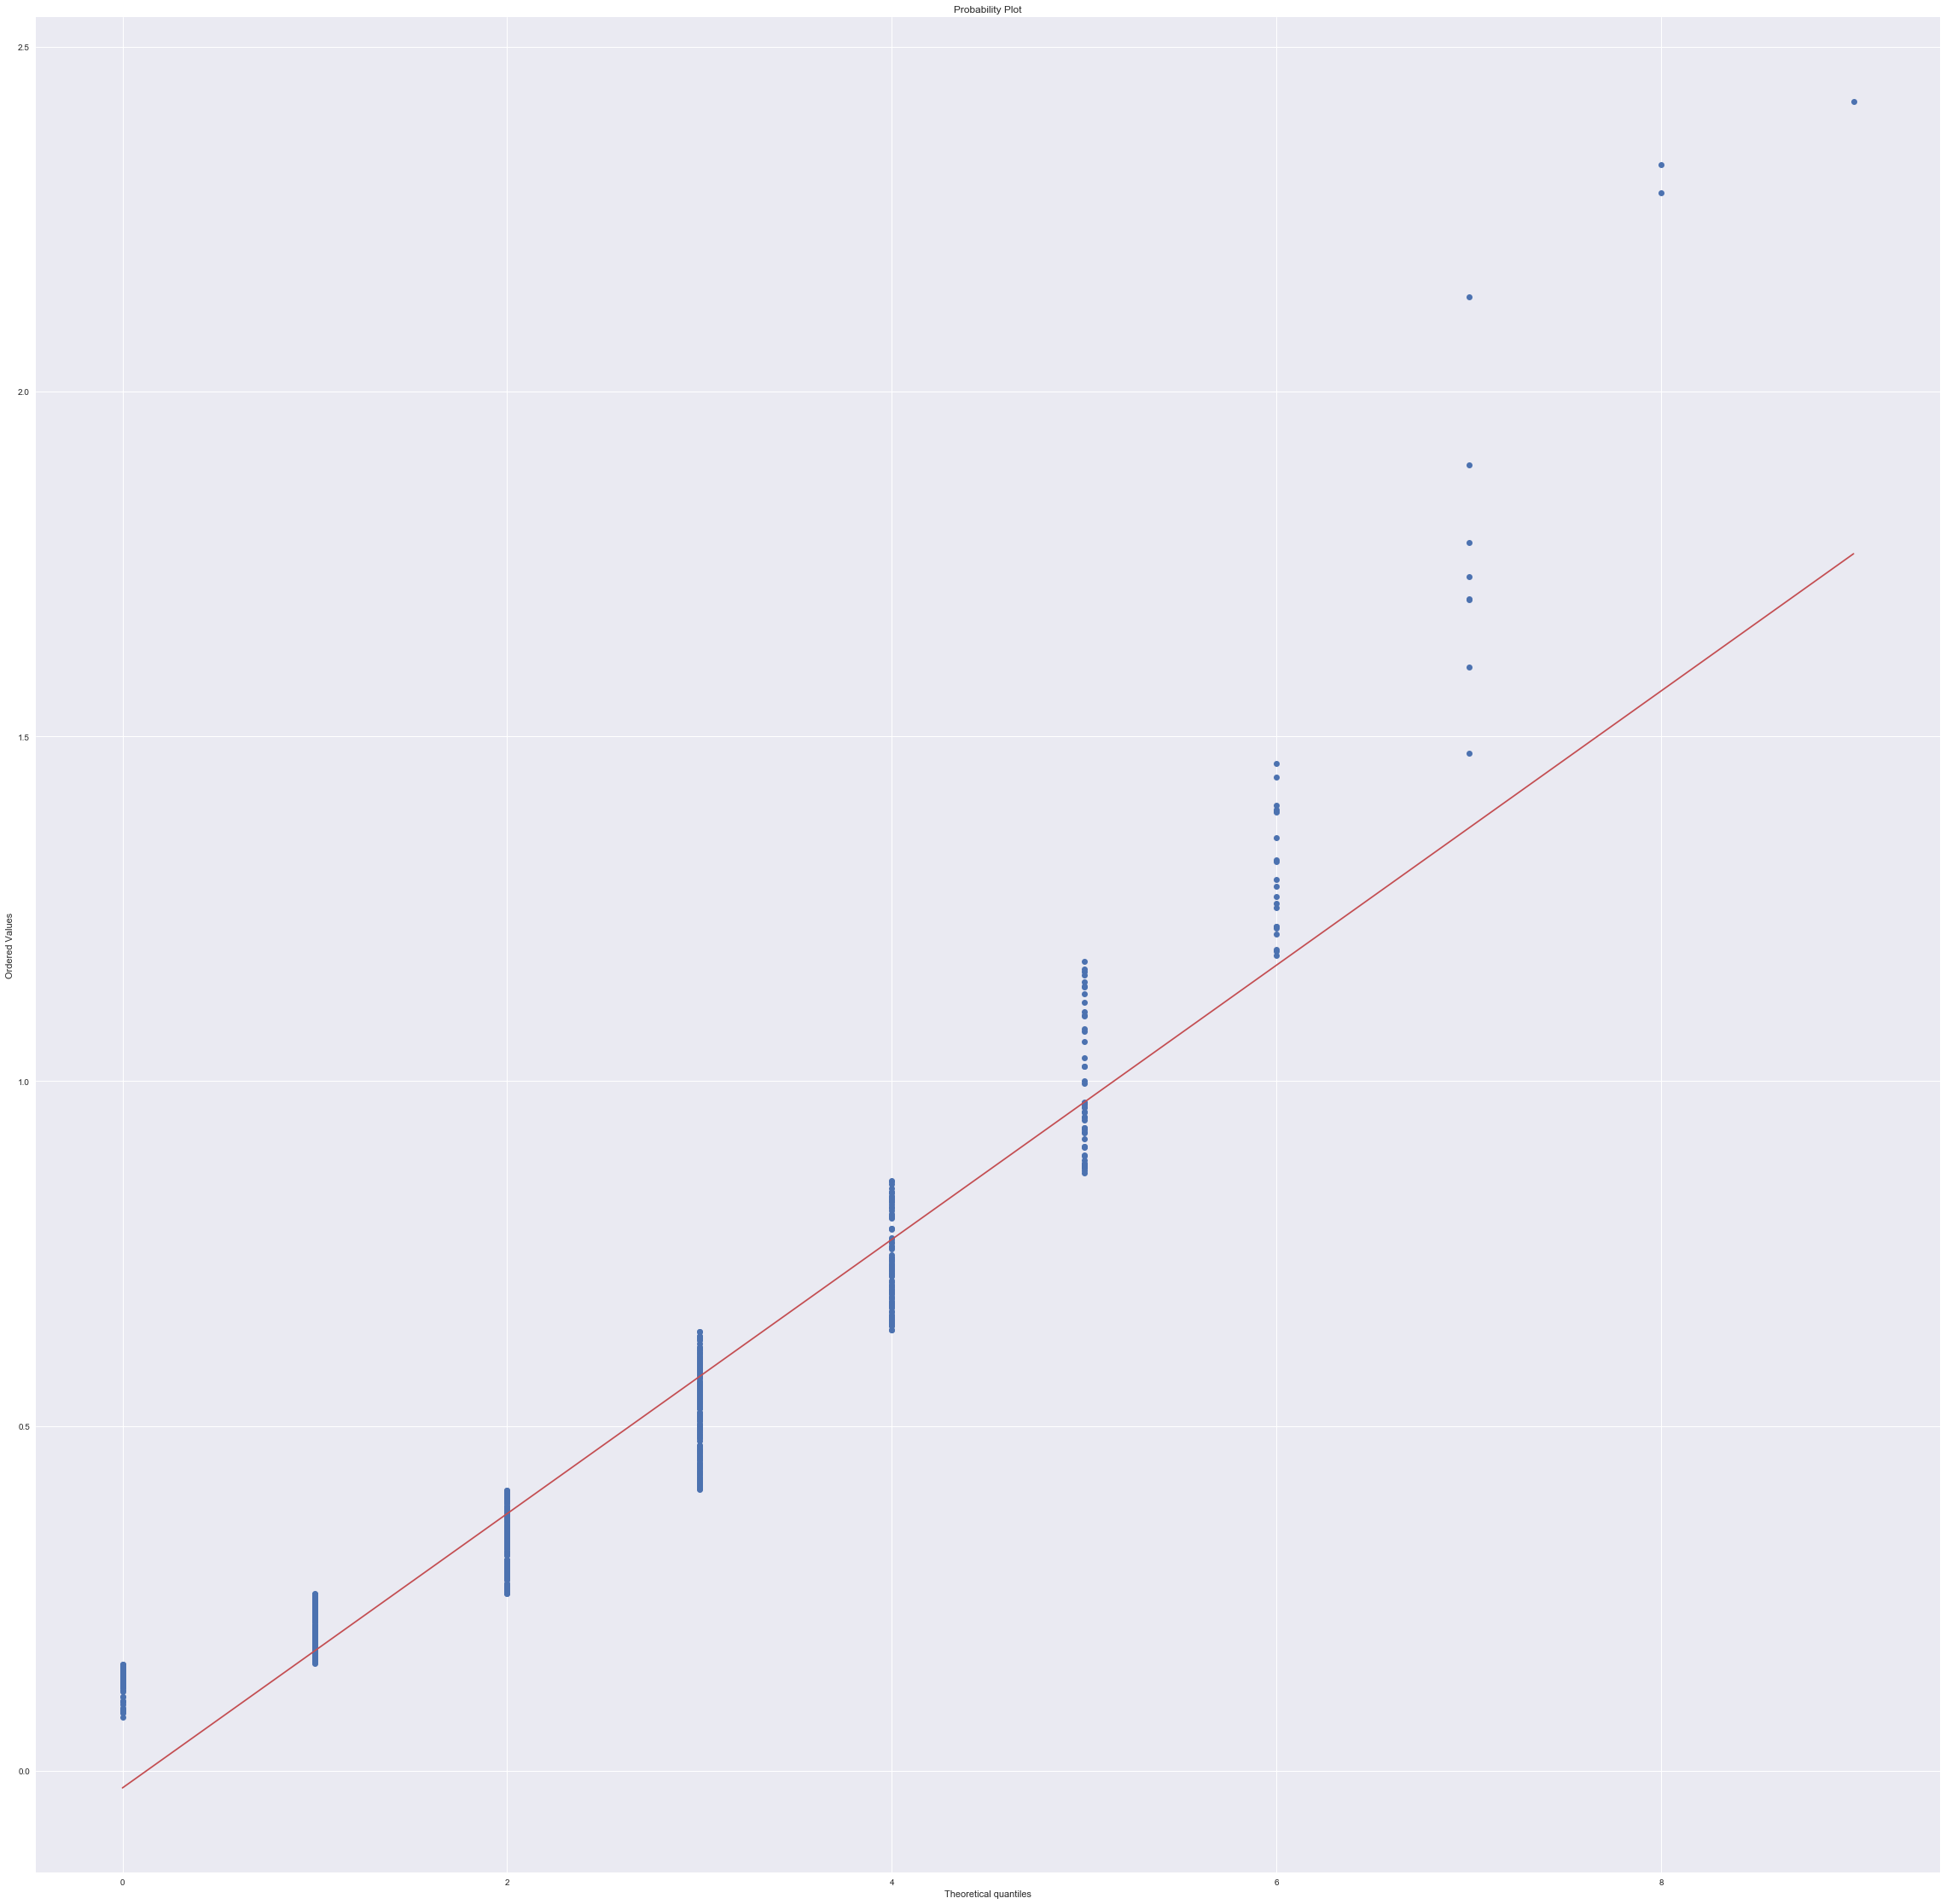

KstestResult(statistic=0.56571430882855755, pvalue=0.0)

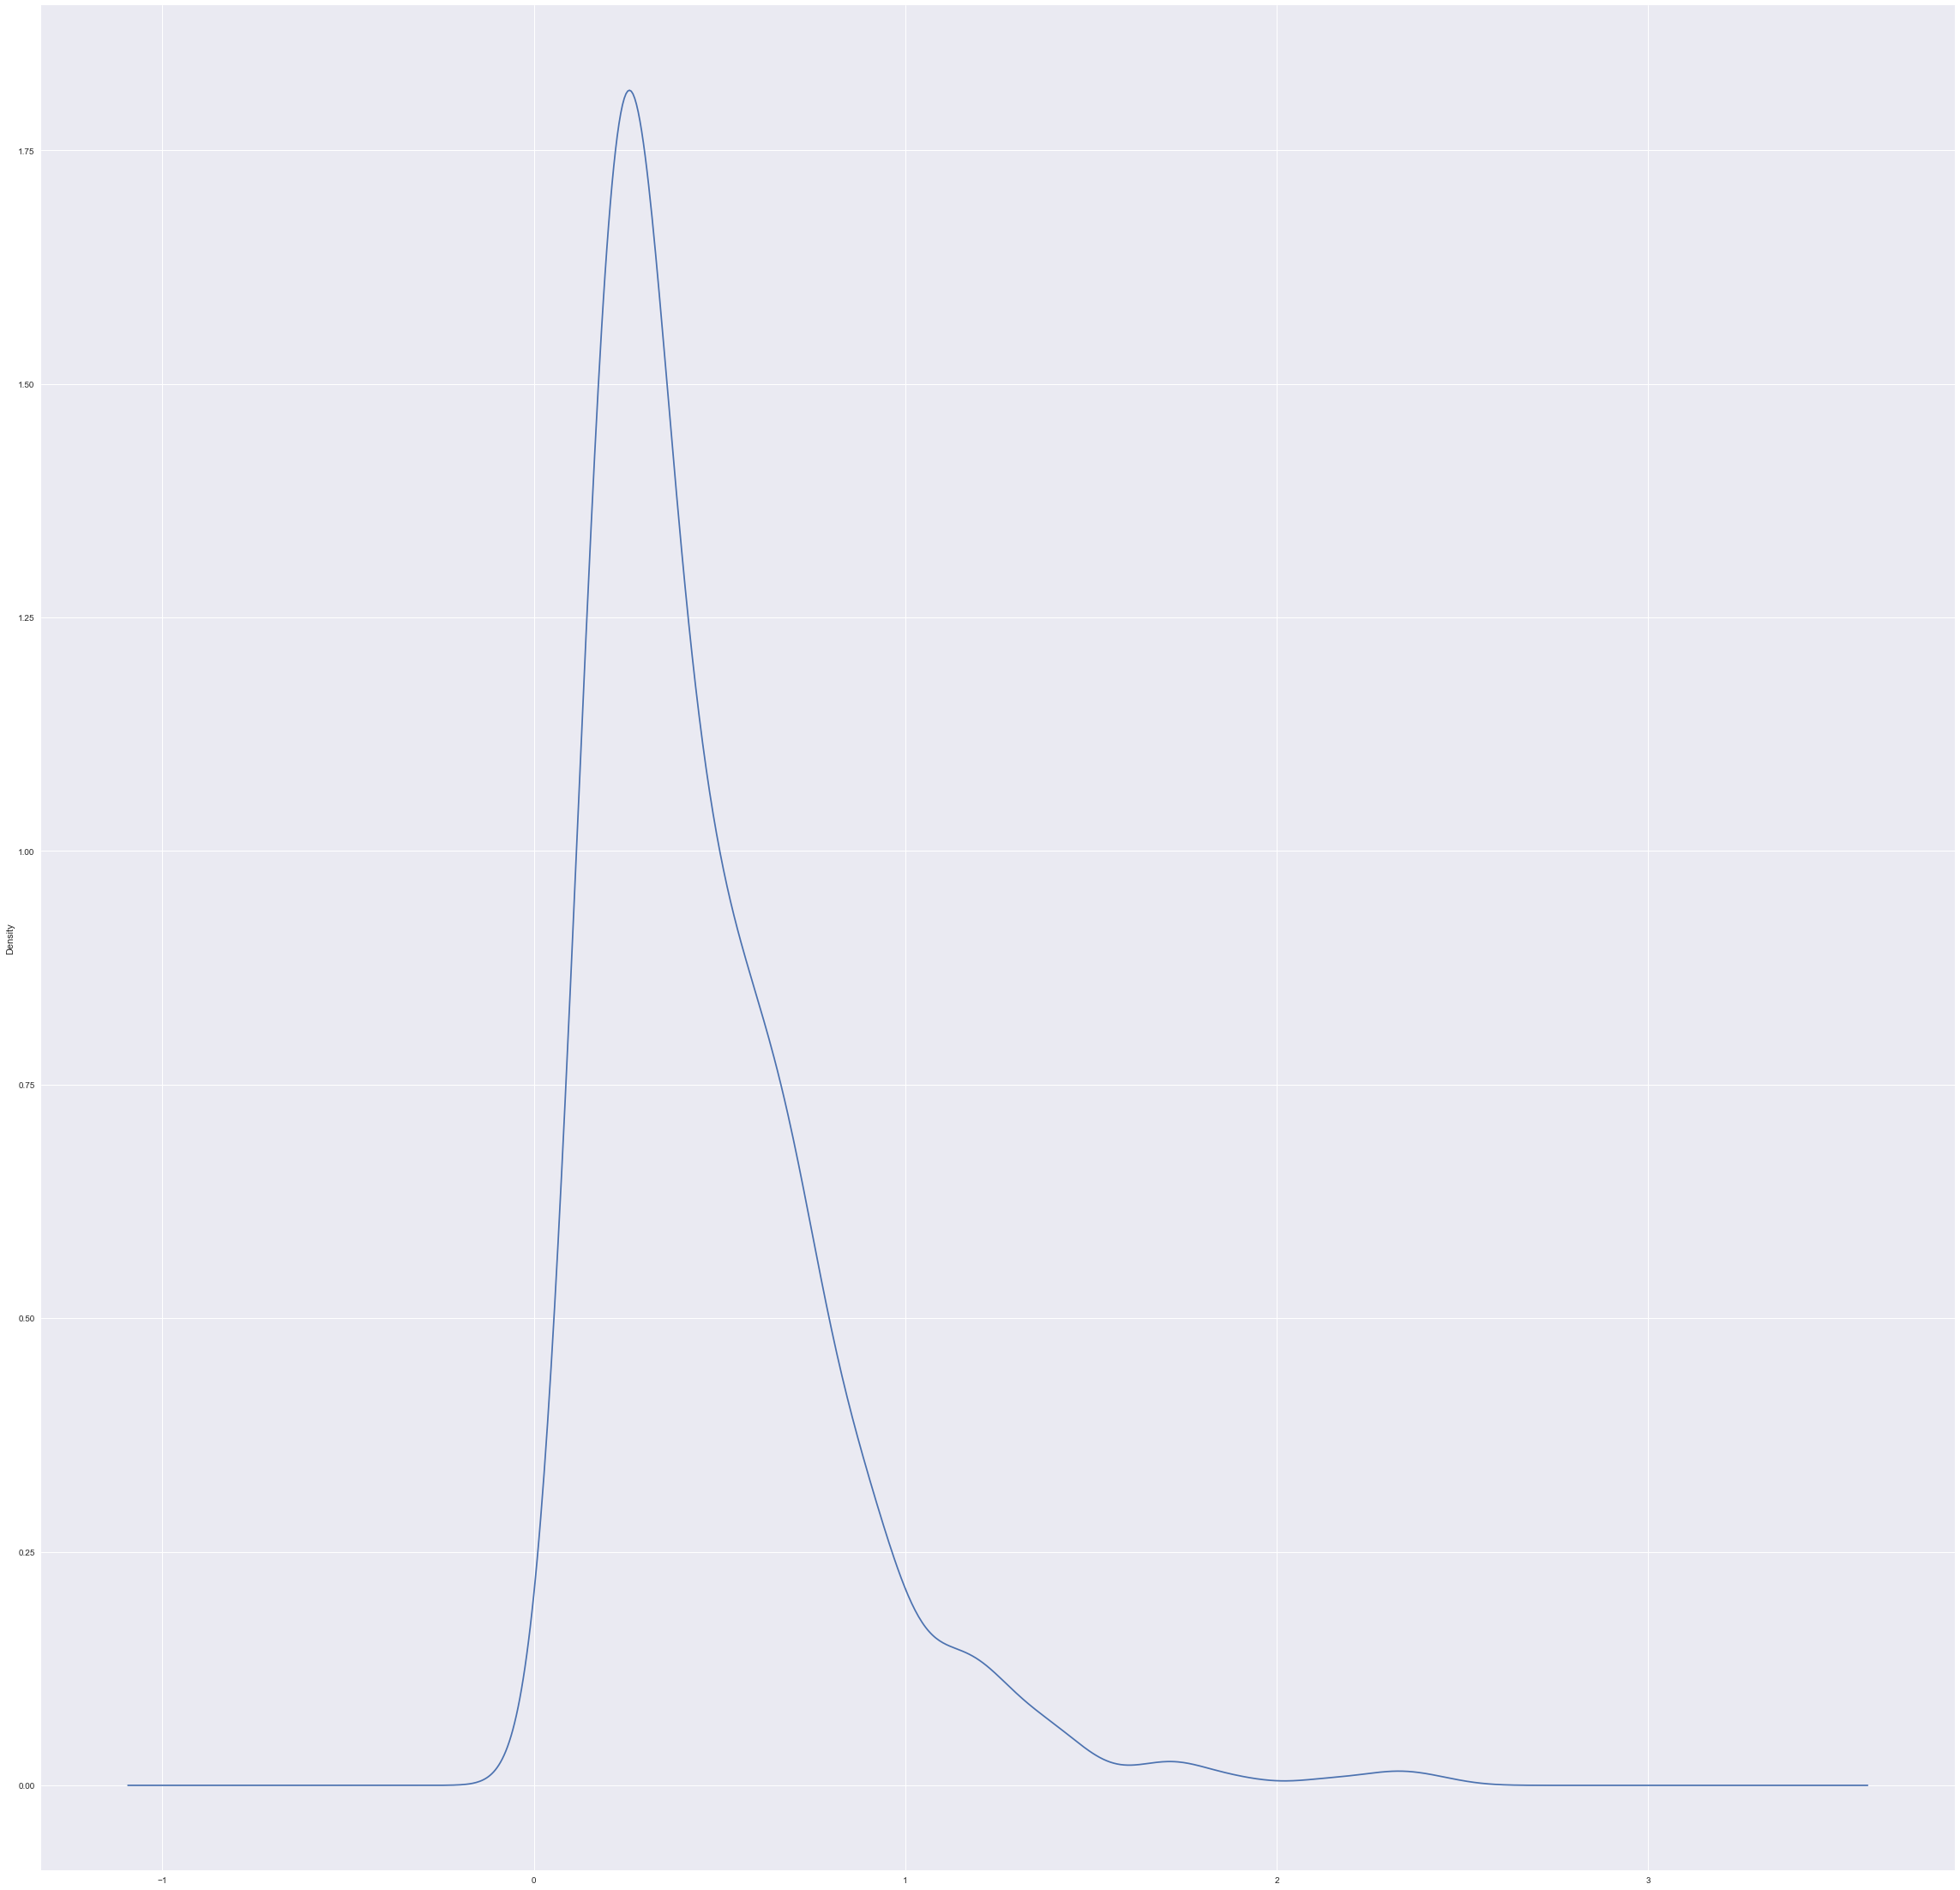

In [28]:
# Poison distribution test for Age
stats.probplot(Data['DiabetesPedigreeFunction'].values, dist='poisson', sparams=(2.5,), plot=plt)
plt.show()
Data['DiabetesPedigreeFunction'].plot.density()
#Does DiabetesPedigreeFunction follow poison distribution?
#H0 : DiabetesPedigreeFunction follow poisson distribution
#H1 : DiabetesPedigreeFunction do not follow poisson distribution
stats.kstest(Data['DiabetesPedigreeFunction'],'poisson', args=(1,), alternative = 'greater')

In [29]:
####  'DiabetesPedigreeFunction' do not follow Poisson distribution (alpha = 0.05 we reject Null Hypothesis, There are no significant outlier in QQ PLOT
### However, there seems to be mixtures in the tail values which are outliers probably based on outcome.

# Q4. Use descriptive statistics elements to describe the dataset

In [30]:
# Summary of dataset 
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# Number of missing values
Data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Q5  Find relationship between various attributes.

### Clustering to visualize missing vallues

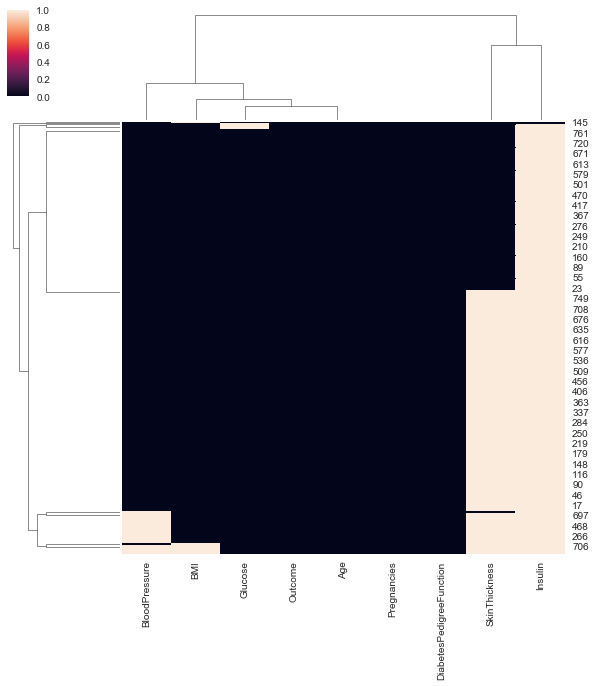

In [32]:
Data_missing = Data[pd.isnull(Data).any(axis=1)]
sns.clustermap(Data_missing.isnull())

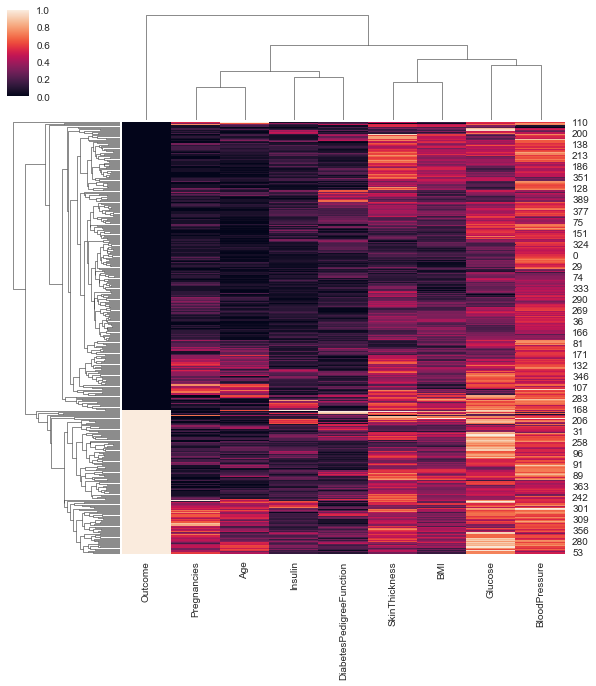

In [33]:
# Visualizing Pattern of Data set in terms of heatmap which can reveal information about distribution of data and pattern of data collection
# If Data sampling has correlation or pattern it could show row wise correlations in Data.
Data_Scaled = Data.copy()
Data_Scaled = Data_Scaled.dropna()
scaler = MinMaxScaler()
Data_Scaled = scaler.fit_transform(Data_Scaled)
Data_Scaled = pd.DataFrame(data = Data_Scaled,columns = Columns)
sns.set(color_codes=True)
sns.clustermap(Data_Scaled)

#### Correlation analysis

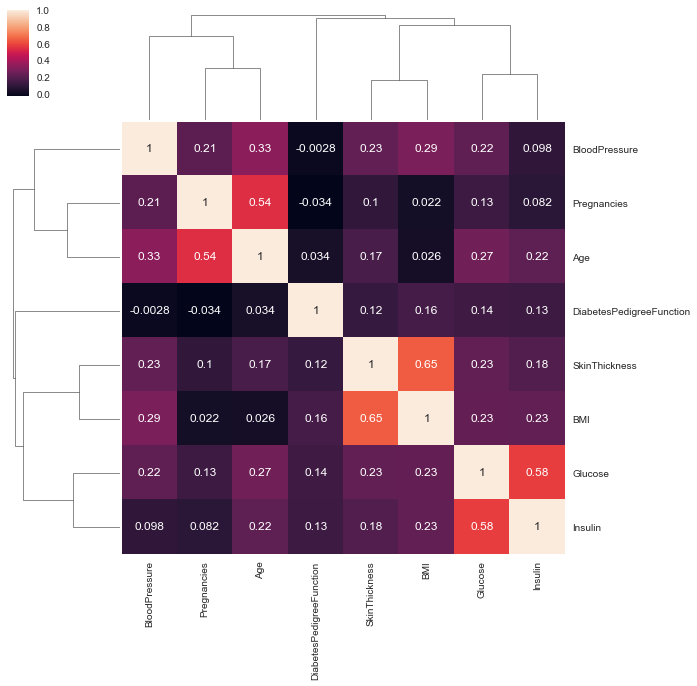

In [34]:
# Analysis of Correlations
Corr = Data.drop(['Outcome'], axis =1).corr()
sns.clustermap(Corr, annot=True)

# Positive Correlations pair
### Glucose vs Insulin
### BMI vs Skin Thickness
### Pregnancies vs Age

# Let's check how correlation changes between Diabetese vs non diabetes

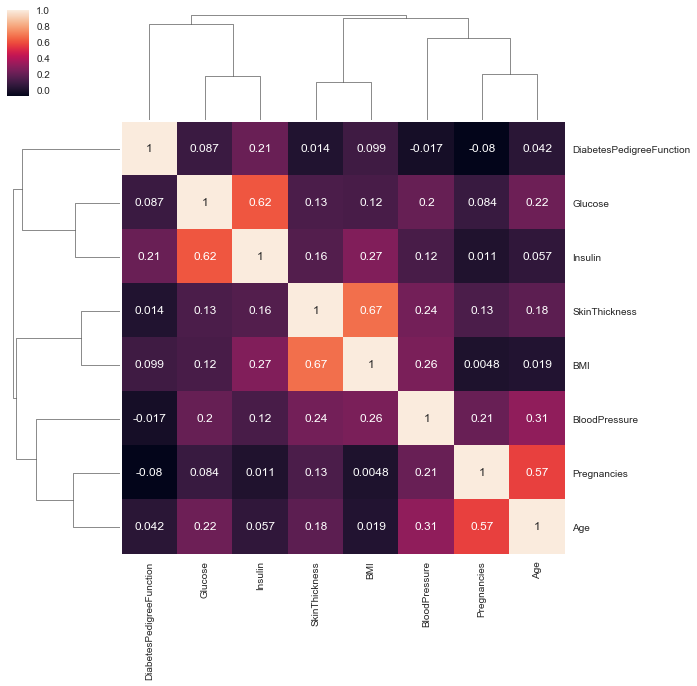

In [35]:
Data_non = Data.loc[Data.Outcome == 0,:]
Corr_non = Data_non.drop(['Outcome'], axis =1).corr()
sns.clustermap(Corr_non, annot=True)

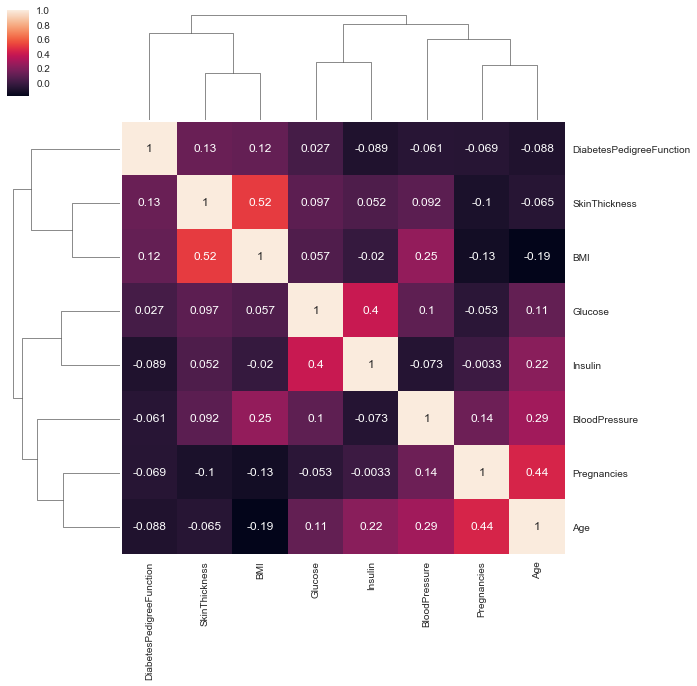

In [36]:
Data_diab = Data.loc[Data.Outcome == 1,:]
Corr_diab = Data_diab.drop(['Outcome'], axis =1).corr()
sns.clustermap(Corr_diab, annot=True)

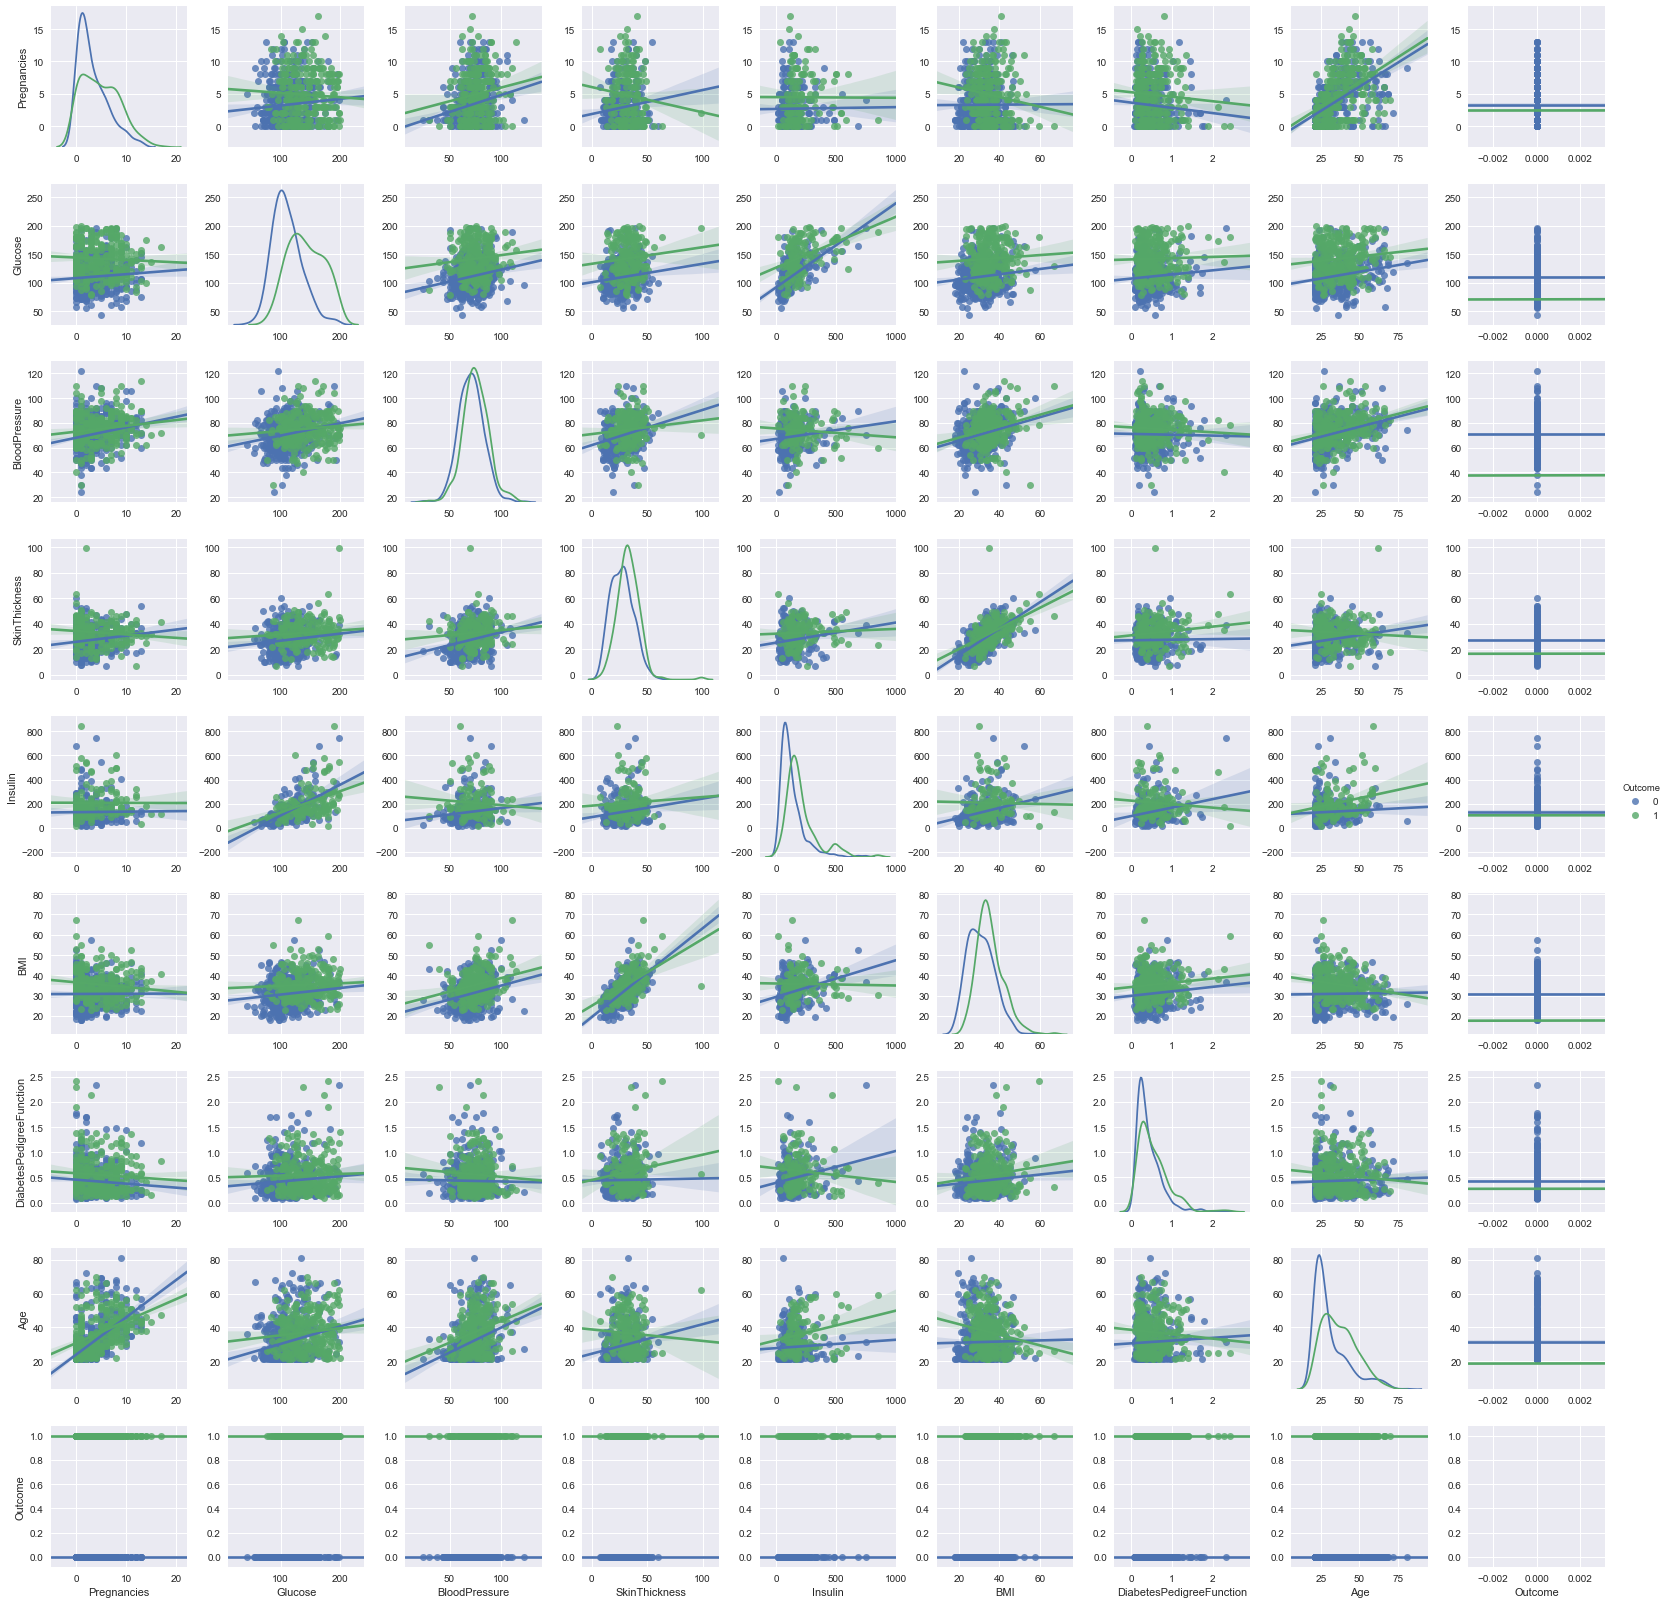

In [37]:
sns.pairplot(data = Data, hue="Outcome", kind="reg",diag_kind='kde')

# Q 5 State your insights from the dataset.


### Age and Pregnancies are positively correlated.
### Insulin and Glucose are positively correlated.
### BMI and Skin Thickness are positively correlated.

### The Variance covariance structure between the correlated variables is different for different levels of Outcome.
### This difference of variance covariance could be used for discriminant analysis.
### There are missing values coded as 0 in the data set.

### Distinct level of Hierarchy in the data set is observed (BMI and Skin Thickness + PDiabetese Pedigree) , (Age and Praagnencies + Blood Pressure) and  (Insulin and Glucose)  which defines the dataset.
### The variables like Age and Preganencies follow Poisson distribution due to which they have lot of false outlier observed in box plot

### Some Variables have mixtures present in marginal probability distribution